In [46]:
import os
import torch
import torchvision
import torch.nn as nn
import pickle
import pylab
import numpy as np
import scipy
import torch.optim as optim
import pandas as pd
import torchvision.datasets as datasets
import time
import tensorflow as tf
import alibi


from tensorflow.keras import backend as K
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, Input, UpSampling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import MinMaxScaler

from scipy.spatial.distance import euclidean
from scipy.stats import shapiro, normaltest

from torchvision import transforms
from torchvision.utils import save_image

from collections import Counter

from copy import deepcopy

from torch.autograd import Variable

from skimage.io import imread

# Local imports
from local_models import *
from helper_functions import *
from piece_hurdle_model import *
from optimize_explanations import *
from evaluation_metrics import *

#new lib
import matplotlib.pyplot as plt
import glob
from sklearn.metrics import accuracy_score
from itertools import combinations
from sklearn.model_selection import train_test_split

In [18]:
# Load models and data
G, cnn = load_models(CNN, Generator)
# classifierCNN = ClassifierCNN(cnn)
# croppedCNN = CroppedCNN(cnn)
train_loader, test_loader = load_dataloaders()
X_train, y_train, X_test, y_test = get_MNIST_data(datasets)

expt1_data = pd.DataFrame(columns=['rand_num', 'name', 'MC-Mean', 'MC-STD', 'NN-Dist', 'IM1', 'IM2', 'optim_time'])
#temp_data = pd.DataFrame(columns=['rand_num', 'name', 'MC-Mean', 'MC-STD', 'NN-Dist', 'IM1', 'IM2', 'optim_time'])
df_piece = pd.DataFrame(columns=['rand_num', 'name', 'MC-Mean', 'MC-STD', 'NN-Dist', 'IM1', 'IM2', 'optim_time'])
df_ME = pd.DataFrame(columns=['rand_num', 'name', 'MC-Mean', 'MC-STD', 'NN-Dist', 'IM1', 'IM2', 'optim_time'])
df_CME = pd.DataFrame(columns=['rand_num', 'name', 'MC-Mean', 'MC-STD', 'NN-Dist', 'IM1', 'IM2', 'optim_time'])


In [19]:
# k-NN for NN-Dist
X_train_act = np.load("data/distribution_data/X_train_act.npy")
X_test_act = np.load("data/distribution_data/X_test_act.npy")
X_train_pred = np.load("data/distribution_data/X_train_pred.npy")
X_test_pred = np.load("data/distribution_data/X_test_pred.npy")
k_nn = KNeighborsClassifier(n_neighbors=1, algorithm='brute')
k_nn.fit(X_train_act, X_train_pred)

KNeighborsClassifier(algorithm='brute', n_neighbors=1)

In [20]:
# Loading AEs for IM1 and IM2 metrics
aes, ae_full = load_autoencoders()


In [21]:
# Probabilitiy threshold for identifying "Exceptional Features" with PIECE
alpha = 0.05

Label: 4
Prediction: 6


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
1 PIECE
-------------------------------
Loss: 0.10618222504854202
Loss: 0.017609434202313423
Loss: 0.014922543428838253
Loss: 0.01320558786392212
Loss: 0.012053937651216984
Loss: 0.01130745280534029
Original Pred: 6, Target Class: 4
Time to do one digit: 11.059
 
-------------------------------
1 Min-Edit
-------------------------------
1.3612717390060425
1.1435976028442383
0.912653923034668
Original Pred: 6, Target Class: 4
Time to do one digit: 5.353
 
-------------------------------
1 C-Min-Edit
-------------------------------
0.7855907678604126
1.491944670677185
1.9809510707855225
2.260370969772339
Original Pred: 6, Target Class: 4
Time to do one digit: 4.447
Label: 6
Prediction: 0


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
2 PIECE
-------------------------------
Loss: 0.10380129516124725
Loss: 0.0028801874723285437
Loss: 0.002334390766918659
Loss: 0.002064060652628541
Loss: 0.0019696028903126717
Loss: 0.001760596176609397
Original Pred: 0, Target Class: 6
Time to do one digit: 8.544
 
-------------------------------
2 Min-Edit
-------------------------------
1.7643928527832031
1.1659619808197021
Original Pred: 0, Target Class: 6
Time to do one digit: 3.387
 
-------------------------------
2 C-Min-Edit
-------------------------------
1.0559206008911133
1.8828020095825195
2.1437158584594727
Original Pred: 0, Target Class: 6
Time to do one digit: 3.74
Label: 4
Prediction: 9


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
3 PIECE
-------------------------------
Loss: 0.0551975853741169
Loss: 0.009182094596326351
Loss: 0.0066101085394620895
Loss: 0.005342571530491114
Loss: 0.005010805558413267
Loss: 0.004841219633817673
Original Pred: 9, Target Class: 4
Time to do one digit: 11.137
 
-------------------------------
3 Min-Edit
-------------------------------
Original Pred: 9, Target Class: 4
Time to do one digit: 3.637
 
-------------------------------
3 C-Min-Edit
-------------------------------
Original Pred: 9, Target Class: 4
Time to do one digit: 3.697
Label: 8
Prediction: 2


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
4 PIECE
-------------------------------
Loss: 0.10304684191942215
Loss: 0.0667993500828743
Loss: 0.03805885463953018
Loss: 0.03205837681889534
Loss: 0.02857065573334694
Loss: 0.02691025100648403
Original Pred: 2, Target Class: 8
Time to do one digit: 9.605
 
-------------------------------
4 Min-Edit
-------------------------------
2.825967788696289
2.656071186065674
2.5437772274017334
2.4424290657043457
2.37833833694458
2.321439504623413
2.286271810531616
2.2288708686828613
2.13045334815979
2.053467273712158
1.915734052658081
1.8085323572158813
1.475030541419983
1.2204182147979736
Original Pred: 2, Target Class: 8
Time to do one digit: 5.187
 
-------------------------------
4 C-Min-Edit
-------------------------------
1.5163545608520508
2.918593168258667
4.234741687774658
5.401205062866211
6.410064697265625
7.401652812957764
8.332569122314453
9.07111644744873
9.756532669067383
10.143775939941406
9.814693450927734
Original Pred: 2, Target Class: 8
Tim

c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
5 PIECE
-------------------------------
Loss: 0.10729367285966873
Loss: 0.011089909821748734
Loss: 0.008577004075050354
Loss: 0.00835736095905304
Loss: 0.008290266618132591
Loss: 0.008246226236224174
Original Pred: 9, Target Class: 8
Time to do one digit: 9.884
 
-------------------------------
5 Min-Edit
-------------------------------
2.5648505687713623
1.7665445804595947
1.1385343074798584
Original Pred: 9, Target Class: 8
Time to do one digit: 3.99
 
-------------------------------
5 C-Min-Edit
-------------------------------
1.7583606243133545
2.6777305603027344
2.967782497406006
2.6125848293304443
Original Pred: 9, Target Class: 8
Time to do one digit: 4.263
Label: 7
Prediction: 1


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
6 PIECE
-------------------------------
Loss: 0.06808158755302429
Loss: 0.007535197772085667
Loss: 0.00668297940865159
Loss: 0.006460781209170818
Loss: 0.006357153877615929
Loss: 0.006283107213675976
Original Pred: 1, Target Class: 7
Time to do one digit: 9.37
 
-------------------------------
6 Min-Edit
-------------------------------
Original Pred: 1, Target Class: 7
Time to do one digit: 3.313
 
-------------------------------
6 C-Min-Edit
-------------------------------
Original Pred: 1, Target Class: 7
Time to do one digit: 3.424
Label: 9
Prediction: 4


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
7 PIECE
-------------------------------
Loss: 0.07234706729650497
Loss: 0.005377083085477352
Loss: 0.004933868534862995
Loss: 0.004662453196942806
Loss: 0.004501667805016041
Loss: 0.0044104233384132385
Original Pred: 4, Target Class: 9
Time to do one digit: 9.653
 
-------------------------------
7 Min-Edit
-------------------------------
1.3275352716445923
0.7669888138771057


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, axarr = plt.subplots(1,3)


Original Pred: 4, Target Class: 9
Time to do one digit: 3.587
 
-------------------------------
7 C-Min-Edit
-------------------------------
0.9867910146713257
1.5606528520584106
1.6364449262619019
Original Pred: 4, Target Class: 9
Time to do one digit: 3.971
Label: 4
Prediction: 9


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
8 PIECE
-------------------------------
Loss: 0.06553828716278076
Loss: 0.009867886081337929
Loss: 0.008365333080291748
Loss: 0.007880771532654762
Loss: 0.007686585653573275
Loss: 0.007543004117906094
Original Pred: 9, Target Class: 4
Time to do one digit: 9.552
 
-------------------------------
8 Min-Edit
-------------------------------
1.2373156547546387
0.8286030292510986
Original Pred: 9, Target Class: 4
Time to do one digit: 3.887
 
-------------------------------
8 C-Min-Edit
-------------------------------
0.8586165308952332
1.4423013925552368
1.6310346126556396
Original Pred: 9, Target Class: 4
Time to do one digit: 4.281
Label: 7
Prediction: 1


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
9 PIECE
-------------------------------
Loss: 0.10868190228939056
Loss: 0.017853563651442528
Loss: 0.00913377944380045
Loss: 0.008802429772913456
Loss: 0.008632063865661621
Loss: 0.008506078273057938
Original Pred: 1, Target Class: 7
Time to do one digit: 8.918
 
-------------------------------
9 Min-Edit
-------------------------------
3.1549723148345947
2.764892101287842
2.280106544494629
1.7940444946289062
1.5257028341293335
1.3224513530731201
1.108511209487915
1.043908953666687
Original Pred: 1, Target Class: 7
Time to do one digit: 4.04
 
-------------------------------
9 C-Min-Edit
-------------------------------
1.705189824104309
3.2798900604248047
4.490188121795654
5.1355977058410645
5.201825141906738
5.299713611602783
5.260191917419434
5.2332916259765625
Original Pred: 1, Target Class: 7
Time to do one digit: 5.264
Label: 5
Prediction: 7


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
10 PIECE
-------------------------------
Loss: 0.12365411221981049
Loss: 0.008030889555811882
Loss: 0.006516969297081232
Loss: 0.0063718874007463455
Loss: 0.006283145863562822
Loss: 0.006001029629260302
Original Pred: 7, Target Class: 5
Time to do one digit: 9.234
 
-------------------------------
10 Min-Edit
-------------------------------
1.1419202089309692
Original Pred: 7, Target Class: 5
Time to do one digit: 3.335
 
-------------------------------
10 C-Min-Edit
-------------------------------
0.7701157927513123
1.389193058013916
Original Pred: 7, Target Class: 5
Time to do one digit: 3.741
Label: 5
Prediction: 3


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
11 PIECE
-------------------------------
Loss: 0.11216933280229568
Loss: 0.06937438994646072
Loss: 0.05262913182377815
Loss: 0.007544688414782286
Loss: 0.006030596327036619
Loss: 0.005637648049741983
Original Pred: 3, Target Class: 5
Time to do one digit: 9.199
 
-------------------------------
11 Min-Edit
-------------------------------
1.490795373916626
1.463057279586792
1.434109091758728
1.396094560623169
1.3602216243743896
1.3323041200637817
1.3090280294418335
1.2843194007873535
1.2562947273254395
1.2309985160827637
1.2099063396453857
1.1874089241027832
1.1558196544647217
1.112339973449707
1.0752902030944824
1.0253562927246094
0.9836687445640564
0.9595432281494141
0.868257462978363
0.8271862864494324
0.7961470484733582
0.7718987464904785
Original Pred: 3, Target Class: 5
Time to do one digit: 5.571
 
-------------------------------
11 C-Min-Edit
-------------------------------
0.770813524723053
1.5208896398544312
2.256772994995117
2.961278200149536

c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
12 PIECE
-------------------------------
Loss: 0.09910869598388672
Loss: 0.009360713884234428
Loss: 0.008075800724327564
Loss: 0.0072850678116083145
Loss: 0.006620793603360653
Loss: 0.00605313666164875
Original Pred: 3, Target Class: 1
Time to do one digit: 9.902
 
-------------------------------
12 Min-Edit
-------------------------------
0.9805775880813599
Original Pred: 3, Target Class: 1
Time to do one digit: 3.545
 
-------------------------------
12 C-Min-Edit
-------------------------------
0.7128739953041077
1.272443413734436
Original Pred: 3, Target Class: 1
Time to do one digit: 3.758
Label: 5
Prediction: 3


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
13 PIECE
-------------------------------
Loss: 0.08229579031467438
Loss: 0.04627200961112976
Loss: 0.04301677644252777
Loss: 0.039485566318035126
Loss: 0.03670752793550491
Loss: 0.035304076969623566
Original Pred: 3, Target Class: 5
Time to do one digit: 9.556
 
-------------------------------
13 Min-Edit
-------------------------------
Original Pred: 3, Target Class: 5
Time to do one digit: 3.918
 
-------------------------------
13 C-Min-Edit
-------------------------------
0.39840519428253174
0.7802406549453735
Original Pred: 3, Target Class: 5
Time to do one digit: 3.94
Label: 8
Prediction: 3


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
14 PIECE
-------------------------------
Loss: 0.10015423595905304
Loss: 0.022651514038443565
Loss: 0.015146815218031406
Loss: 0.014814704656600952
Loss: 0.014532056637108326
Loss: 0.013266896829009056
Original Pred: 3, Target Class: 8
Time to do one digit: 9.062
 
-------------------------------
14 Min-Edit
-------------------------------
1.4233629703521729
1.1774054765701294
1.0199847221374512
0.8315532207489014
Original Pred: 3, Target Class: 8
Time to do one digit: 3.745
 
-------------------------------
14 C-Min-Edit
-------------------------------
0.870816707611084
1.6384202241897583
2.1378509998321533
2.5242650508880615
2.762669801712036
Original Pred: 3, Target Class: 8
Time to do one digit: 4.335
Label: 9
Prediction: 4


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
15 PIECE
-------------------------------
Loss: 0.1003170907497406
Loss: 0.006008380092680454
Loss: 0.005199145060032606
Loss: 0.004984162747859955
Loss: 0.004880831111222506
Loss: 0.004800497554242611
Original Pred: 4, Target Class: 9
Time to do one digit: 9.851
 
-------------------------------
15 Min-Edit
-------------------------------
3.5333151817321777
2.979295492172241
2.343449831008911
1.651664137840271
1.2698121070861816
0.9004878401756287
Original Pred: 4, Target Class: 9
Time to do one digit: 3.996
 
-------------------------------
15 C-Min-Edit
-------------------------------
1.9940907955169678
3.578563690185547
4.612277507781982
4.79401969909668
4.371511459350586
3.881652355194092
Original Pred: 4, Target Class: 9
Time to do one digit: 4.159
Label: 5
Prediction: 3


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
16 PIECE
-------------------------------
Loss: 0.0698326826095581
Loss: 0.011441107839345932
Loss: 0.010140781290829182
Loss: 0.009510017931461334
Loss: 0.009335141628980637
Loss: 0.009248080663383007
Original Pred: 3, Target Class: 5
Time to do one digit: 8.421
 
-------------------------------
16 Min-Edit
-------------------------------
1.3818727731704712
Original Pred: 3, Target Class: 5
Time to do one digit: 3.27
 
-------------------------------
16 C-Min-Edit
-------------------------------
1.1033697128295898
1.6508461236953735
Original Pred: 3, Target Class: 5
Time to do one digit: 3.471
Label: 6
Prediction: 0


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
17 PIECE
-------------------------------
Loss: 0.08874402940273285
Loss: 0.024843668565154076
Loss: 0.007321144454181194
Loss: 0.005628989543765783
Loss: 0.0054162940941751
Loss: 0.005183451343327761
Original Pred: 0, Target Class: 6
Time to do one digit: 9.858
 
-------------------------------
17 Min-Edit
-------------------------------
1.0591466426849365
0.9611663818359375
0.8942418098449707
0.8285927772521973
Original Pred: 0, Target Class: 6
Time to do one digit: 3.775
 
-------------------------------
17 C-Min-Edit
-------------------------------
0.6108401417732239
1.160222053527832
1.6396640539169312
2.0284364223480225
2.324716567993164
Original Pred: 0, Target Class: 6
Time to do one digit: 4.329
Label: 4
Prediction: 9


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
18 PIECE
-------------------------------
Loss: 0.0859404057264328
Loss: 0.0038462409283965826
Loss: 0.0035438952036201954
Loss: 0.0034400655422359705
Loss: 0.003405472729355097
Loss: 0.0033697295002639294
Original Pred: 9, Target Class: 4
Time to do one digit: 8.784
 
-------------------------------
18 Min-Edit
-------------------------------
2.5941312313079834
1.6405277252197266
Original Pred: 9, Target Class: 4
Time to do one digit: 3.719
 
-------------------------------
18 C-Min-Edit
-------------------------------
1.5579445362091064
2.5590732097625732
2.626509666442871
Original Pred: 9, Target Class: 4
Time to do one digit: 3.955
Label: 6
Prediction: 1


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
19 PIECE
-------------------------------
Loss: 0.1358046680688858
Loss: 0.023925455287098885
Loss: 0.016876667737960815
Loss: 0.01337460521608591
Loss: 0.009556902572512627
Loss: 0.00853647943586111
Original Pred: 1, Target Class: 6
Time to do one digit: 9.06
 
-------------------------------
19 Min-Edit
-------------------------------
2.914985418319702
2.236886501312256
1.7235361337661743
1.4413187503814697
1.2221753597259521
0.9622060060501099
Original Pred: 1, Target Class: 6
Time to do one digit: 3.745
 
-------------------------------
19 C-Min-Edit
-------------------------------
1.7117550373077393
3.177844285964966
4.009608268737793
4.243155479431152
4.465143203735352
4.567201137542725
Original Pred: 1, Target Class: 6
Time to do one digit: 4.065
Label: 1
Prediction: 3


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
20 PIECE
-------------------------------
Loss: 0.1156519278883934
Loss: 0.008919615298509598
Loss: 0.008543123491108418
Loss: 0.00826466828584671
Loss: 0.008144233375787735
Loss: 0.00803754385560751
Original Pred: 3, Target Class: 1
Time to do one digit: 8.976
 
-------------------------------
20 Min-Edit
-------------------------------
2.271836519241333
1.7938053607940674
1.5266209840774536
1.312313199043274
Original Pred: 3, Target Class: 1
Time to do one digit: 3.447
 
-------------------------------
20 C-Min-Edit
-------------------------------
1.3658230304718018
2.4727163314819336
3.1041409969329834
3.518738269805908
Original Pred: 3, Target Class: 1
Time to do one digit: 3.831
Label: 9
Prediction: 4


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
21 PIECE
-------------------------------
Loss: 0.09049087762832642
Loss: 0.009730537422001362
Loss: 0.008309698663651943
Loss: 0.0077870069071650505
Loss: 0.007369163911789656
Loss: 0.006730284541845322
Original Pred: 4, Target Class: 9
Time to do one digit: 8.862
 
-------------------------------
21 Min-Edit
-------------------------------
1.2762932777404785
Original Pred: 4, Target Class: 9
Time to do one digit: 3.288
 
-------------------------------
21 C-Min-Edit
-------------------------------
0.8722997307777405
1.5401766300201416
1.6937333345413208
Original Pred: 4, Target Class: 9
Time to do one digit: 4.081
Label: 5
Prediction: 3


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
22 PIECE
-------------------------------
Loss: 0.13149569928646088
Loss: 0.009925929829478264
Loss: 0.007590860594063997
Loss: 0.007080044597387314
Loss: 0.006874389015138149
Loss: 0.006688414607197046
Original Pred: 3, Target Class: 5
Time to do one digit: 8.876
 
-------------------------------
22 Min-Edit
-------------------------------
4.2974348068237305
1.8102500438690186
Original Pred: 3, Target Class: 5
Time to do one digit: 3.447
 
-------------------------------
22 C-Min-Edit
-------------------------------
2.915170669555664
4.342513084411621
3.134819507598877
Original Pred: 3, Target Class: 5
Time to do one digit: 3.885
Label: 6
Prediction: 1


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
23 PIECE
-------------------------------
Loss: 0.16304907202720642
Loss: 0.008813919499516487
Loss: 0.0063226837664842606
Loss: 0.005922263488173485
Loss: 0.00584658095613122
Loss: 0.0057997917756438255
Original Pred: 1, Target Class: 6
Time to do one digit: 8.946
 
-------------------------------
23 Min-Edit
-------------------------------
4.014869213104248
3.2826080322265625
2.1432063579559326
Original Pred: 1, Target Class: 6
Time to do one digit: 3.482
 
-------------------------------
23 C-Min-Edit
-------------------------------
2.192964553833008
4.065054416656494
5.104333400726318
4.731217384338379
Original Pred: 1, Target Class: 6
Time to do one digit: 3.943
Label: 8
Prediction: 0


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
24 PIECE
-------------------------------
Loss: 0.08499176800251007
Loss: 0.02175643853843212
Loss: 0.02021438255906105
Loss: 0.01992112211883068
Loss: 0.01968206837773323
Loss: 0.01924980618059635
Original Pred: 0, Target Class: 8
Time to do one digit: 9.899
 
-------------------------------
24 Min-Edit
-------------------------------
1.0952656269073486
0.7549190521240234
Original Pred: 0, Target Class: 8
Time to do one digit: 3.323
 
-------------------------------
24 C-Min-Edit
-------------------------------
0.7116822004318237
1.278397798538208
1.56850266456604
Original Pred: 0, Target Class: 8
Time to do one digit: 4.232
Label: 6
Prediction: 0


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
25 PIECE
-------------------------------
Loss: 0.08505714684724808
Loss: 0.005772615782916546
Loss: 0.005418786779046059
Loss: 0.005303747020661831
Loss: 0.005237800069153309
Loss: 0.005201646126806736
Original Pred: 0, Target Class: 6
Time to do one digit: 8.677
 
-------------------------------
25 Min-Edit
-------------------------------
0.8890294432640076
Original Pred: 0, Target Class: 6
Time to do one digit: 3.286
 
-------------------------------
25 C-Min-Edit
-------------------------------
0.5940316319465637
1.0887023210525513
1.3440967798233032
Original Pred: 0, Target Class: 6
Time to do one digit: 3.591
Label: 7
Prediction: 9


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
26 PIECE
-------------------------------
Loss: 0.10337524116039276
Loss: 0.0075560747645795345
Loss: 0.006496126763522625
Loss: 0.005978545174002647
Loss: 0.005901159252971411
Loss: 0.00583861256018281
Original Pred: 9, Target Class: 7
Time to do one digit: 9.08
 
-------------------------------
26 Min-Edit
-------------------------------
2.5455496311187744
1.4853339195251465
Original Pred: 9, Target Class: 7
Time to do one digit: 3.515
 
-------------------------------
26 C-Min-Edit
-------------------------------
1.6167720556259155
2.721532106399536
2.846705436706543
Original Pred: 9, Target Class: 7
Time to do one digit: 4.07
Label: 6
Prediction: 0


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
27 PIECE
-------------------------------
Loss: 0.09769643843173981
Loss: 0.010843480937182903
Loss: 0.010332770645618439
Loss: 0.009728748351335526
Loss: 0.005693318787962198
Loss: 0.005054065957665443
Original Pred: 0, Target Class: 6
Time to do one digit: 8.419
 
-------------------------------
27 Min-Edit
-------------------------------
1.5750021934509277
Original Pred: 0, Target Class: 6
Time to do one digit: 3.364
 
-------------------------------
27 C-Min-Edit
-------------------------------
1.2042512893676758
1.7546453475952148
Original Pred: 0, Target Class: 6
Time to do one digit: 3.588
Label: 6
Prediction: 4


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
28 PIECE
-------------------------------
Loss: 0.10860838741064072
Loss: 0.017494969069957733
Loss: 0.010025709867477417
Loss: 0.008583561517298222
Loss: 0.007439841981977224
Loss: 0.006221560295671225
Original Pred: 4, Target Class: 6
Time to do one digit: 9.278
 
-------------------------------
28 Min-Edit
-------------------------------
1.5885998010635376
1.3375027179718018
1.1377627849578857
Original Pred: 4, Target Class: 6
Time to do one digit: 4.293
 
-------------------------------
28 C-Min-Edit
-------------------------------
0.8859652280807495
1.6925992965698242
2.261875867843628
2.6208527088165283
Original Pred: 4, Target Class: 6
Time to do one digit: 4.293
Label: 7
Prediction: 2


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
29 PIECE
-------------------------------
Loss: 0.06046205386519432
Loss: 0.011410563252866268
Loss: 0.009541995823383331
Loss: 0.008618579246103764
Loss: 0.008091596886515617
Loss: 0.007559376768767834
Original Pred: 2, Target Class: 7
Time to do one digit: 8.576
 
-------------------------------
29 Min-Edit
-------------------------------
1.4959220886230469
1.3593519926071167
1.218648076057434
1.111081838607788
1.0228021144866943
0.932468056678772
0.8455795645713806
0.7648899555206299
Original Pred: 2, Target Class: 7
Time to do one digit: 4.04
 
-------------------------------
29 C-Min-Edit
-------------------------------
0.8184148073196411
1.5678749084472656
2.2104451656341553
2.648345708847046
2.9129035472869873
3.1286990642547607
3.241969108581543
Original Pred: 2, Target Class: 7
Time to do one digit: 4.298
Label: 6
Prediction: 8


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
30 PIECE
-------------------------------
Loss: 0.10311799496412277
Loss: 0.008157826960086823
Loss: 0.007445381488651037
Loss: 0.007342115044593811
Loss: 0.007199888117611408
Loss: 0.007100939750671387
Original Pred: 8, Target Class: 6
Time to do one digit: 8.54
 
-------------------------------
30 Min-Edit
-------------------------------
Original Pred: 8, Target Class: 6
Time to do one digit: 3.269
 
-------------------------------
30 C-Min-Edit
-------------------------------
0.5627800822257996
1.04441499710083
Original Pred: 8, Target Class: 6
Time to do one digit: 4.151
Label: 3
Prediction: 5


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
31 PIECE
-------------------------------
Loss: 0.082213394343853
Loss: 0.0035501555539667606
Loss: 0.0034187762066721916
Loss: 0.0032702661119401455
Loss: 0.0031277849338948727
Loss: 0.002888157032430172
Original Pred: 5, Target Class: 3
Time to do one digit: 8.78
 
-------------------------------
31 Min-Edit
-------------------------------
0.7755966186523438
Original Pred: 5, Target Class: 3
Time to do one digit: 3.317
 
-------------------------------
31 C-Min-Edit
-------------------------------
0.49565237760543823
0.9154529571533203
Original Pred: 5, Target Class: 3
Time to do one digit: 3.661
Label: 9
Prediction: 4


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
32 PIECE
-------------------------------
Loss: 0.09749966114759445
Loss: 0.004167557694017887
Loss: 0.003599506337195635
Loss: 0.0034849285148084164
Loss: 0.003429807024076581
Loss: 0.003413188038393855
Original Pred: 4, Target Class: 9
Time to do one digit: 8.769
 
-------------------------------
32 Min-Edit
-------------------------------
1.9878783226013184
1.309769868850708
0.9358797669410706
Original Pred: 4, Target Class: 9
Time to do one digit: 3.441
 
-------------------------------
32 C-Min-Edit
-------------------------------
1.2547560930252075
2.120408296585083
2.333171844482422
Original Pred: 4, Target Class: 9
Time to do one digit: 3.805
Label: 5
Prediction: 3


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
33 PIECE
-------------------------------
Loss: 0.0909373015165329
Loss: 0.01015700027346611
Loss: 0.009146044962108135
Loss: 0.007085223216563463
Loss: 0.00654483400285244
Loss: 0.005927420686930418
Original Pred: 3, Target Class: 5
Time to do one digit: 9.423
 
-------------------------------
33 Min-Edit
-------------------------------
2.3035502433776855
0.9878525733947754
Original Pred: 3, Target Class: 5
Time to do one digit: 3.673
 
-------------------------------
33 C-Min-Edit
-------------------------------
1.504616379737854
2.5090527534484863
2.2572014331817627
Original Pred: 3, Target Class: 5
Time to do one digit: 4.056
Label: 7
Prediction: 1


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
34 PIECE
-------------------------------
Loss: 0.14700327813625336
Loss: 0.08756908774375916
Loss: 0.06486184149980545
Loss: 0.06316114962100983
Loss: 0.061670560389757156
Loss: 0.049612004309892654
Original Pred: 1, Target Class: 7
Time to do one digit: 9.518
 
-------------------------------
34 Min-Edit
-------------------------------
5.704741477966309
5.535642623901367
5.396706581115723
5.258739471435547
5.110188961029053
4.954411029815674
4.8253607749938965
4.724512577056885
4.6183247566223145
4.511214733123779
4.423620700836182
4.346282958984375
4.28191614151001
4.208990573883057
4.131795406341553
4.051923751831055
3.969554901123047
3.885894298553467
3.8248233795166016
3.7996392250061035
3.7897326946258545
3.770008087158203
3.752960205078125
3.7371561527252197
3.7192161083221436
3.699836492538452
3.6774051189422607
3.6576004028320312
3.6378555297851562
3.6147449016571045
3.59352970123291
3.571321487426758
3.5520424842834473
3.5343809127807617
3.51

c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
35 PIECE
-------------------------------
Loss: 0.0916236937046051
Loss: 0.007926108315587044
Loss: 0.006875966209918261
Loss: 0.006418559700250626
Loss: 0.0061316112987697124
Loss: 0.005871295463293791
Original Pred: 6, Target Class: 0
Time to do one digit: 9.373
 
-------------------------------
35 Min-Edit
-------------------------------
Original Pred: 6, Target Class: 0
Time to do one digit: 3.57
 
-------------------------------
35 C-Min-Edit
-------------------------------
Original Pred: 6, Target Class: 0
Time to do one digit: 3.579
Label: 7
Prediction: 2


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
36 PIECE
-------------------------------
Loss: 0.05507110059261322
Loss: 0.005865919403731823
Loss: 0.004886114038527012
Loss: 0.004457810893654823
Loss: 0.0043881479650735855
Loss: 0.004323027562350035
Original Pred: 2, Target Class: 7
Time to do one digit: 9.618
 
-------------------------------
36 Min-Edit
-------------------------------
0.9063014984130859
Original Pred: 2, Target Class: 7
Time to do one digit: 3.643
 
-------------------------------
36 C-Min-Edit
-------------------------------
0.6524572968482971
1.1114492416381836
1.316622018814087
Original Pred: 2, Target Class: 7
Time to do one digit: 4.024
Label: 8
Prediction: 5


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
37 PIECE
-------------------------------
Loss: 0.10684699565172195
Loss: 0.0675509124994278
Loss: 0.032749734818935394
Loss: 0.025138121098279953
Loss: 0.015914354473352432
Loss: 0.014891630038619041
Original Pred: 5, Target Class: 8
Time to do one digit: 8.981
 
-------------------------------
37 Min-Edit
-------------------------------
0.9904804825782776
0.9052044153213501
0.8484008312225342
0.781061053276062
Original Pred: 5, Target Class: 8
Time to do one digit: 3.717
 
-------------------------------
37 C-Min-Edit
-------------------------------
0.5606578588485718
1.0769442319869995
1.5295517444610596
1.9107959270477295
2.27085018157959
2.5994908809661865
Original Pred: 5, Target Class: 8
Time to do one digit: 4.233
Label: 7
Prediction: 2


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
38 PIECE
-------------------------------
Loss: 0.05759453400969505
Loss: 0.013859025202691555
Loss: 0.01259732898324728
Loss: 0.011857055127620697
Loss: 0.011304844170808792
Loss: 0.010767530649900436
Original Pred: 2, Target Class: 7
Time to do one digit: 9.056
 
-------------------------------
38 Min-Edit
-------------------------------
0.8851028084754944
Original Pred: 2, Target Class: 7
Time to do one digit: 3.385
 
-------------------------------
38 C-Min-Edit
-------------------------------
0.711564838886261
1.163546085357666
Original Pred: 2, Target Class: 7
Time to do one digit: 3.664
Label: 9
Prediction: 7


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
39 PIECE
-------------------------------
Loss: 0.12920540571212769
Loss: 0.0036606118083000183
Loss: 0.0032637978438287973
Loss: 0.00319331674836576
Loss: 0.0030405251309275627
Loss: 0.002795636188238859
Original Pred: 7, Target Class: 9
Time to do one digit: 8.727
 
-------------------------------
39 Min-Edit
-------------------------------
2.1238627433776855
1.8260689973831177
1.672619342803955
1.5547516345977783
1.4383306503295898
1.3142204284667969
1.1843979358673096
1.0616834163665771
Original Pred: 7, Target Class: 9
Time to do one digit: 4.002
 
-------------------------------
39 C-Min-Edit
-------------------------------
1.277306318283081
2.396231174468994
3.1704928874969482
3.805924892425537
4.3746442794799805
4.752565383911133
5.023310661315918
5.043525218963623
Original Pred: 7, Target Class: 9
Time to do one digit: 4.523
Label: 5
Prediction: 6


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
40 PIECE
-------------------------------
Loss: 0.12564855813980103
Loss: 0.011262960731983185
Loss: 0.00929580070078373
Loss: 0.008543236181139946
Loss: 0.008010211400687695
Loss: 0.007572614122182131
Original Pred: 6, Target Class: 5
Time to do one digit: 10.255
 
-------------------------------
40 Min-Edit
-------------------------------
3.1067910194396973
Original Pred: 6, Target Class: 5
Time to do one digit: 3.873
 
-------------------------------
40 C-Min-Edit
-------------------------------
2.0343821048736572
3.280437707901001
Original Pred: 6, Target Class: 5
Time to do one digit: 4.081
Label: 2
Prediction: 7


c:\Users\13478\Desktop\AAAI-2021-master\AAAI-2021-master\helper_functions.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'] = np.zeros(df.shape[0])


 
-------------------------------
41 PIECE
-------------------------------
Loss: 0.07822258025407791
Loss: 0.008644985035061836
Loss: 0.007300176657736301
Loss: 0.006753038614988327
Loss: 0.006532187573611736
Loss: 0.006379352882504463
Original Pred: 7, Target Class: 2
Time to do one digit: 9.853
 
-------------------------------
41 Min-Edit
-------------------------------
1.5155045986175537
1.1060584783554077
0.7440302968025208
Original Pred: 7, Target Class: 2
Time to do one digit: 3.687
 
-------------------------------
41 C-Min-Edit
-------------------------------
0.9431020021438599
1.6334538459777832
1.9191257953643799
Original Pred: 7, Target Class: 2
Time to do one digit: 4.048


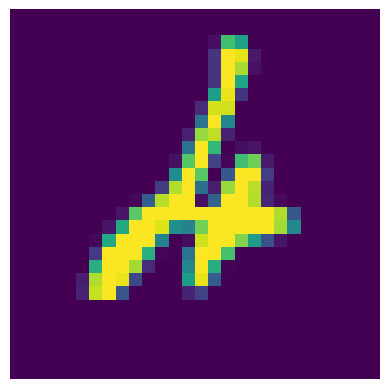

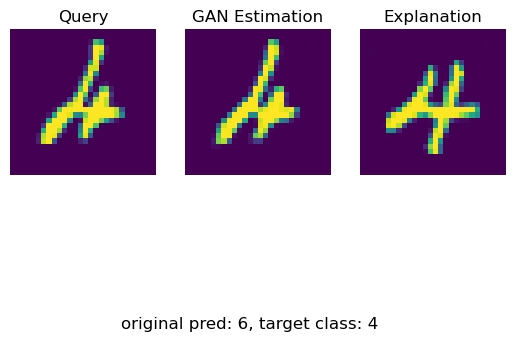

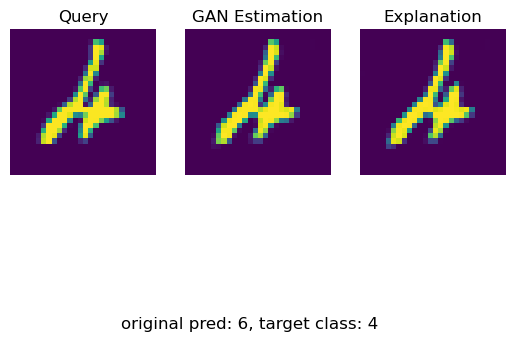

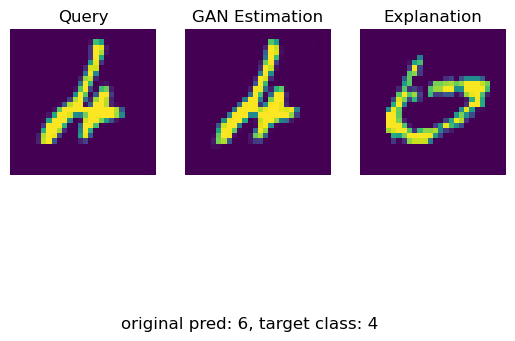

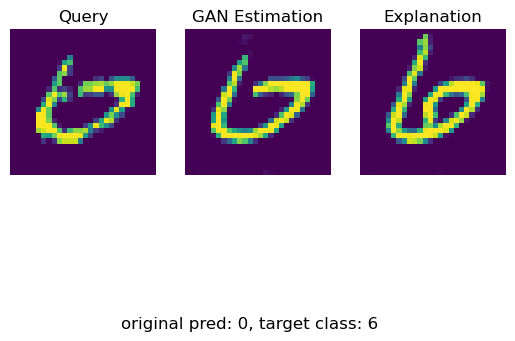

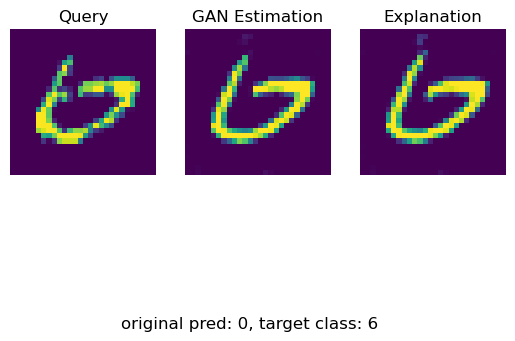

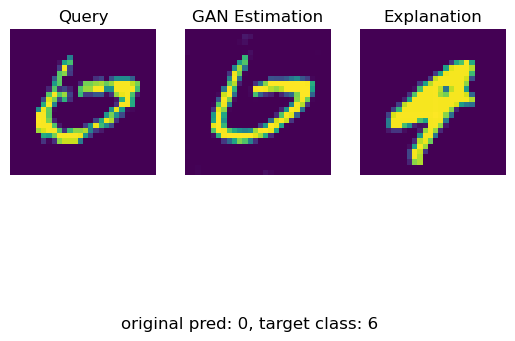

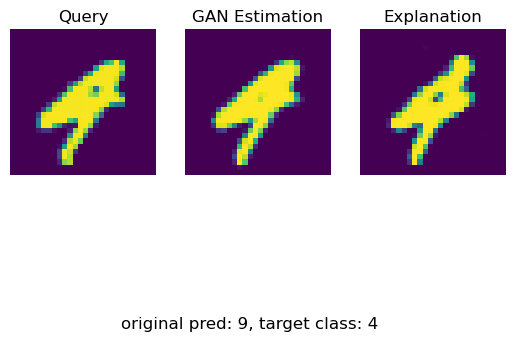

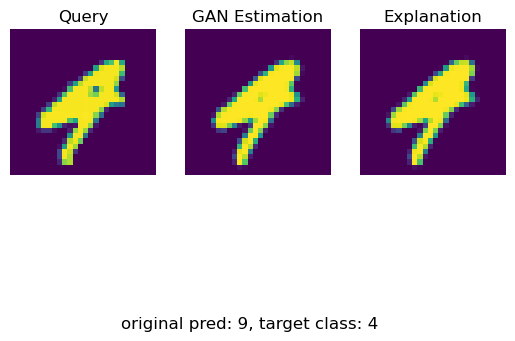

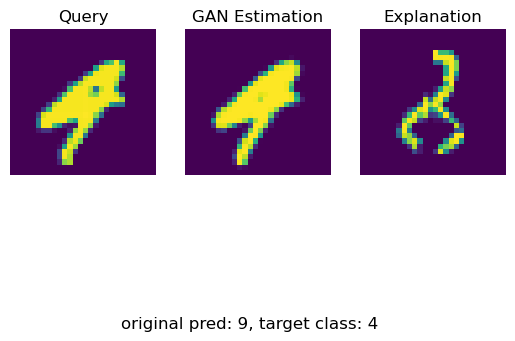

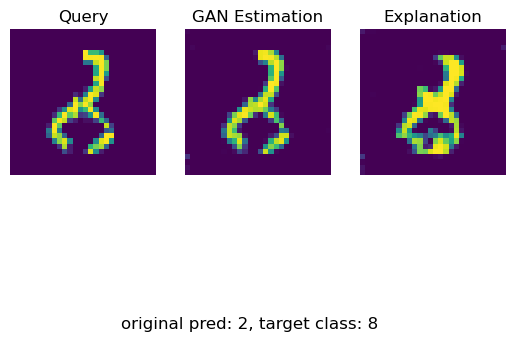

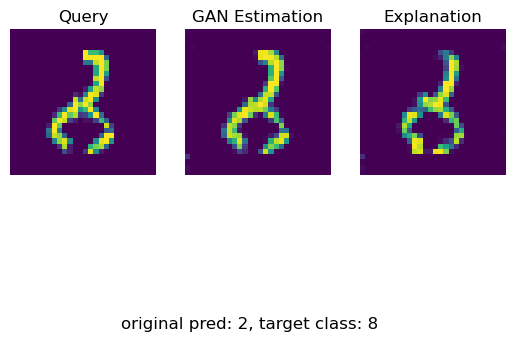

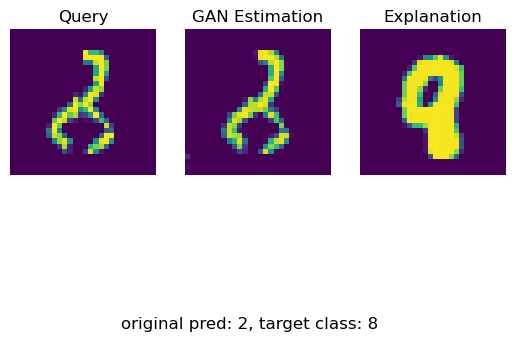

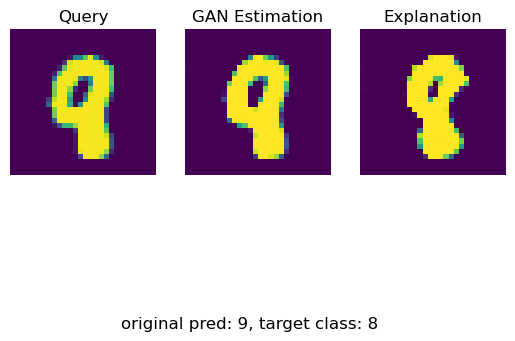

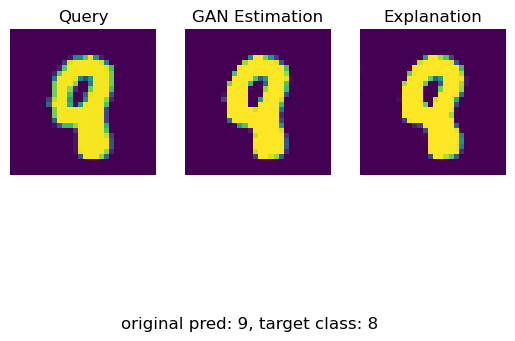

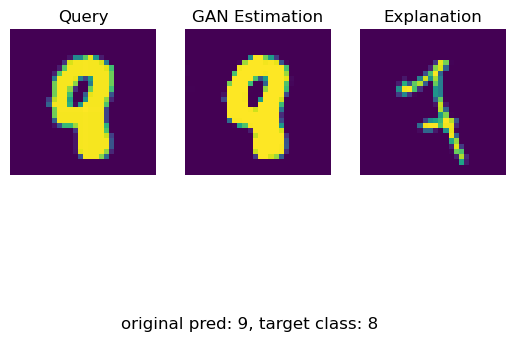

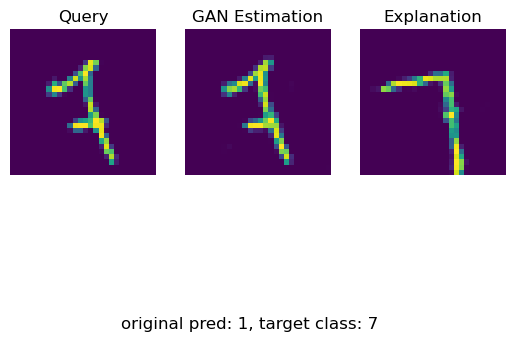

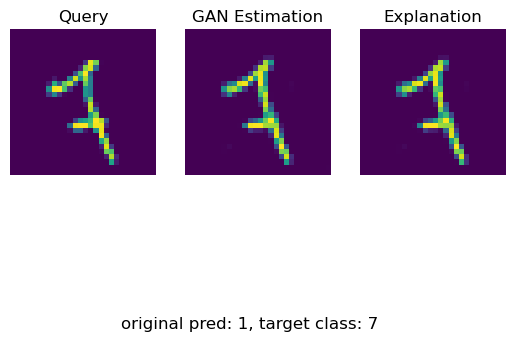

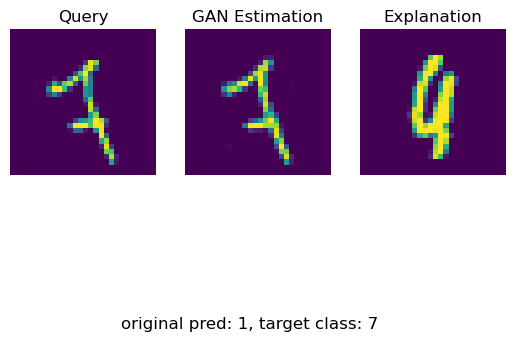

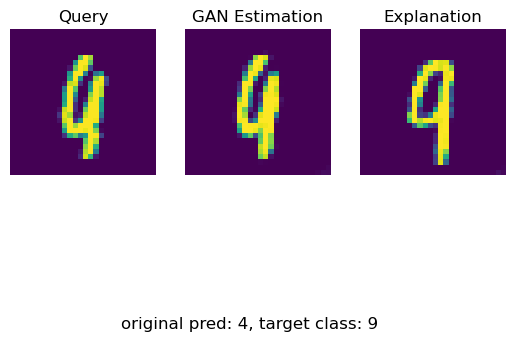

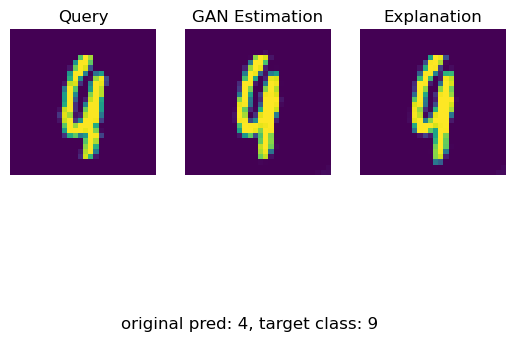

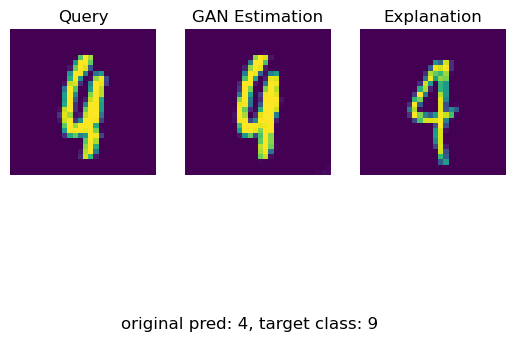

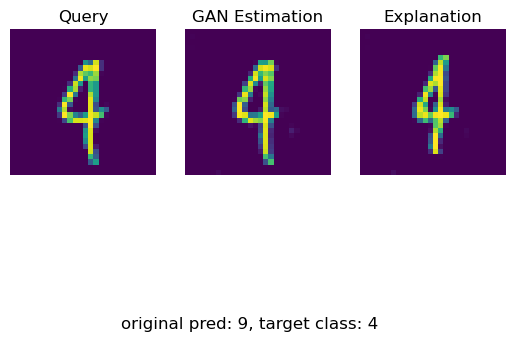

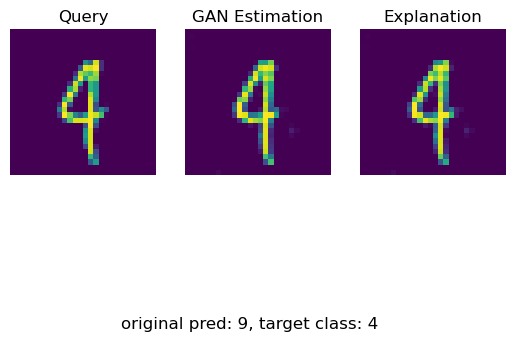

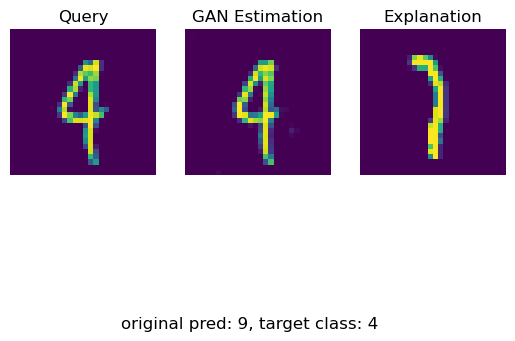

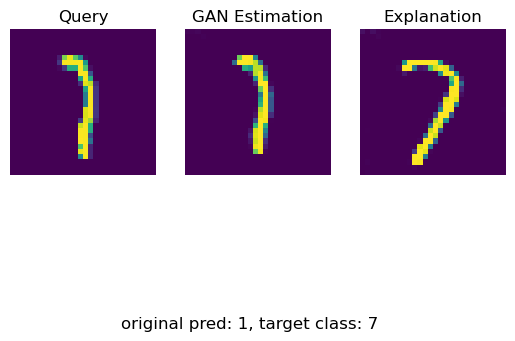

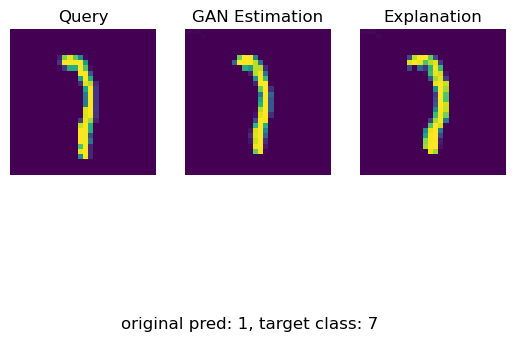

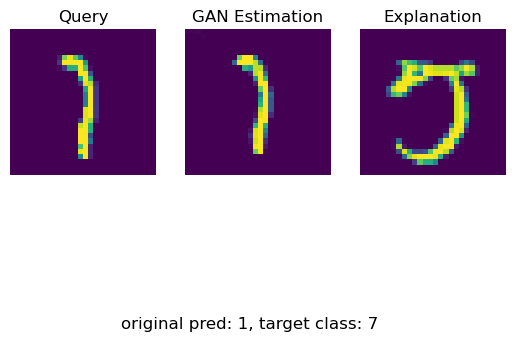

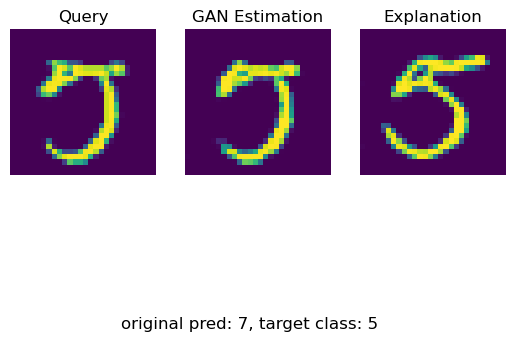

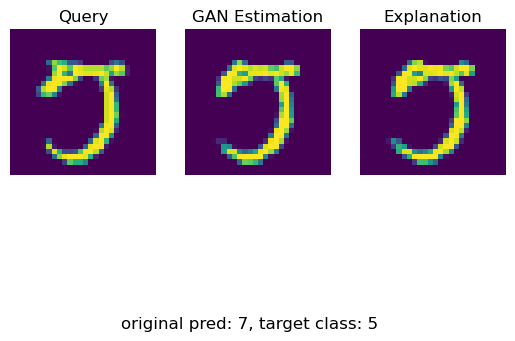

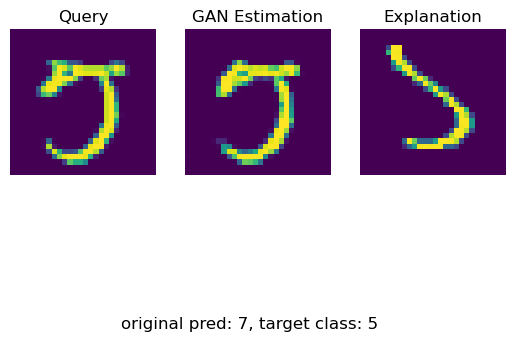

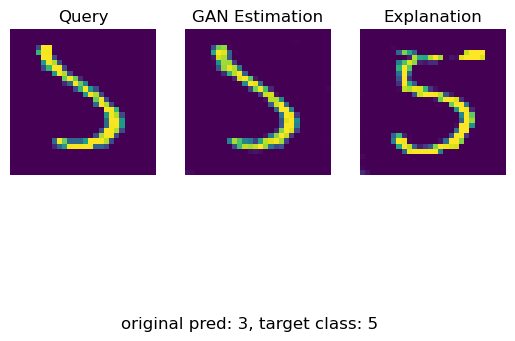

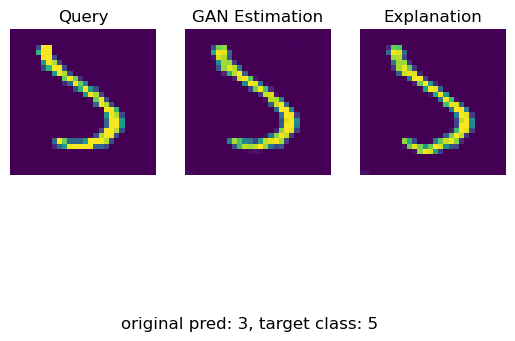

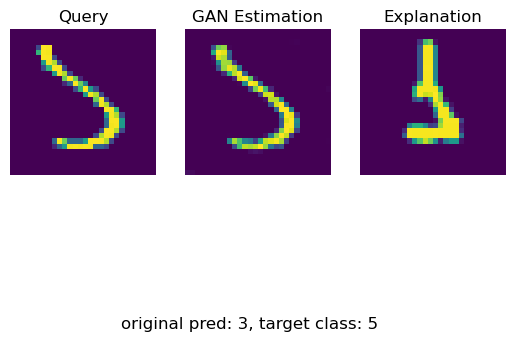

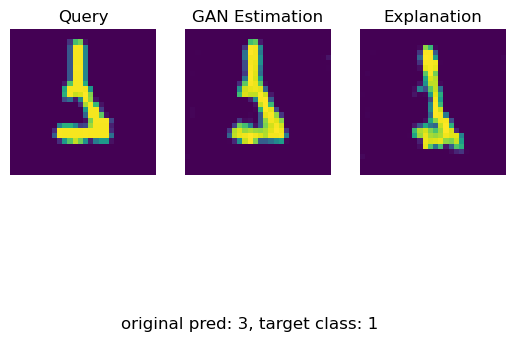

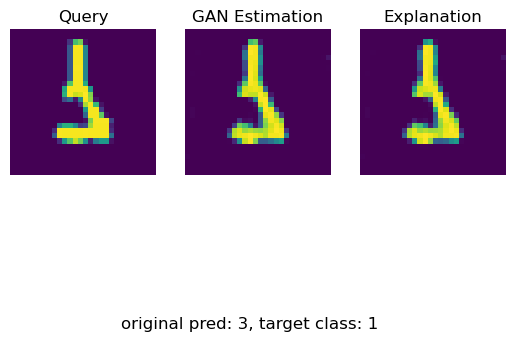

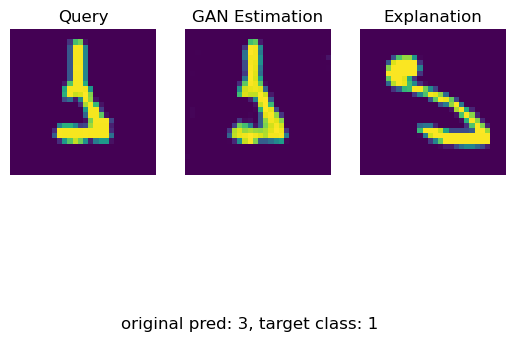

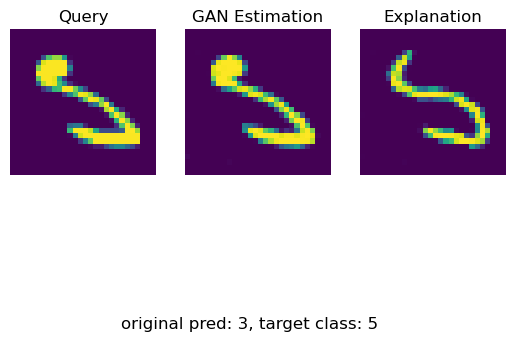

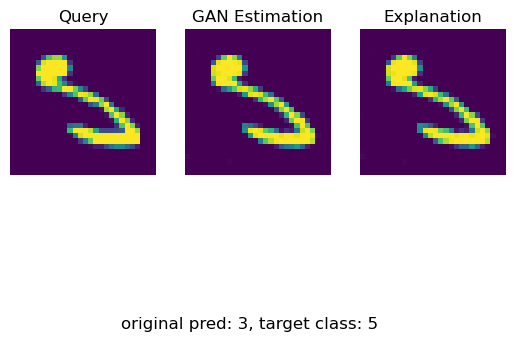

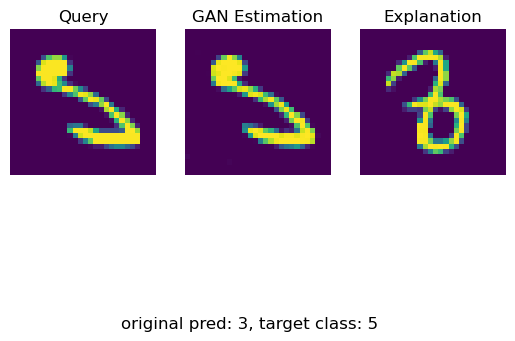

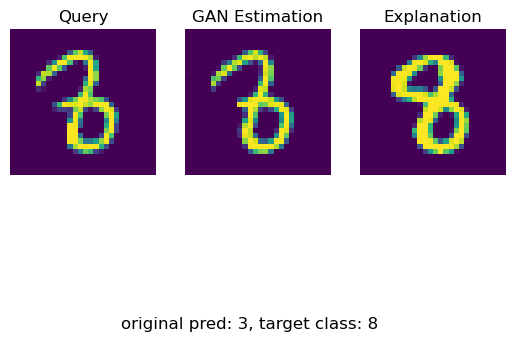

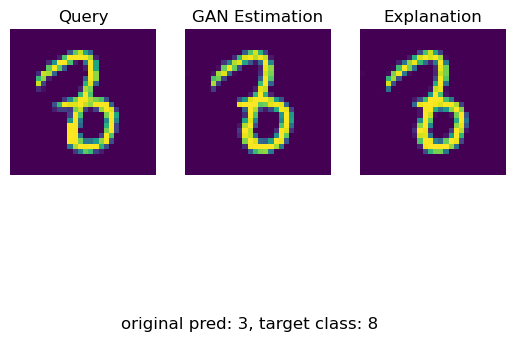

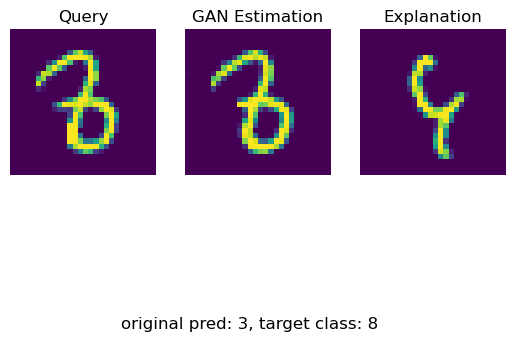

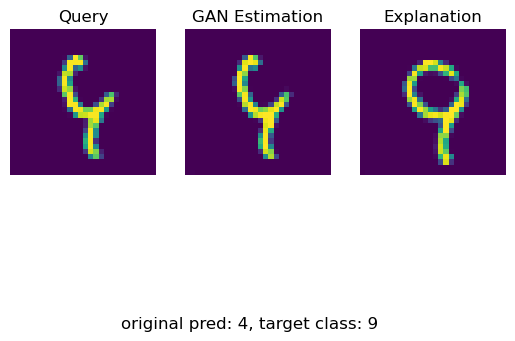

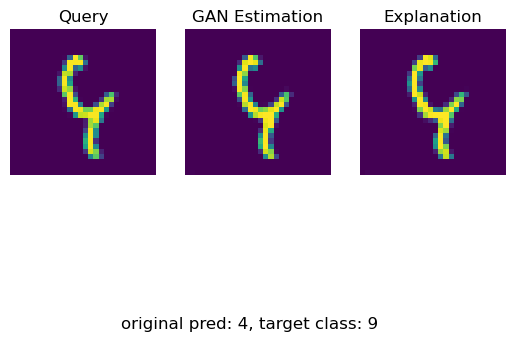

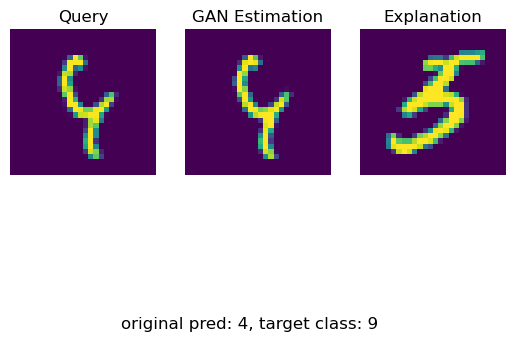

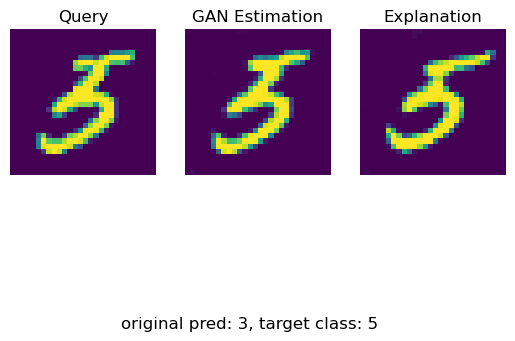

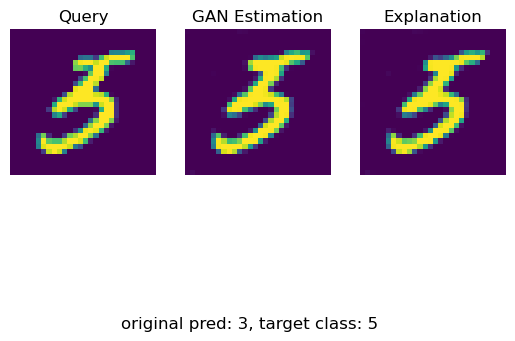

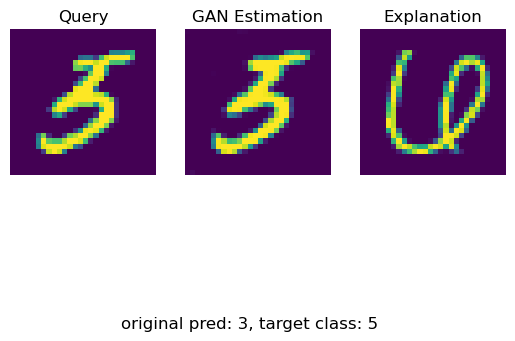

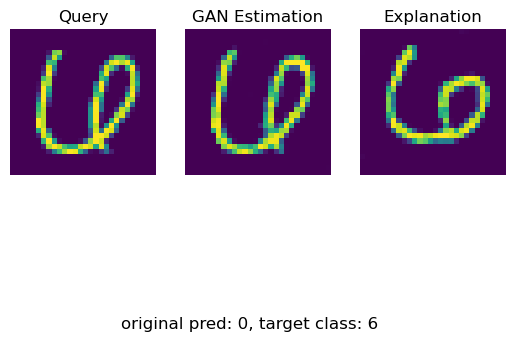

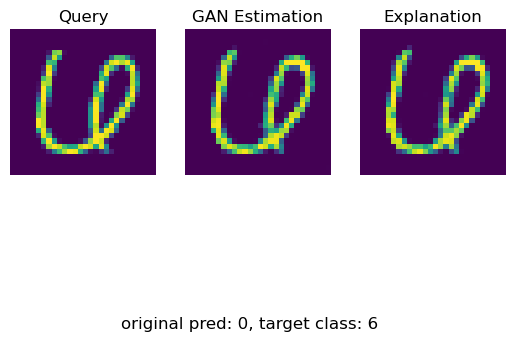

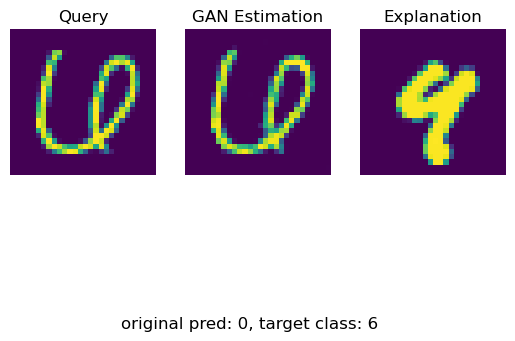

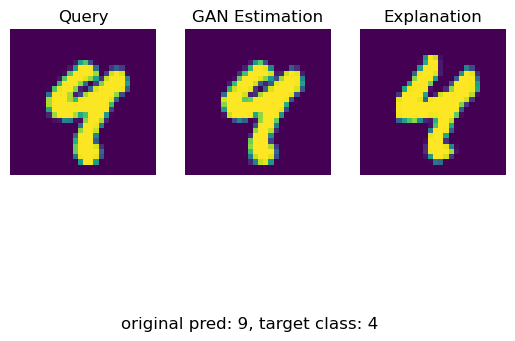

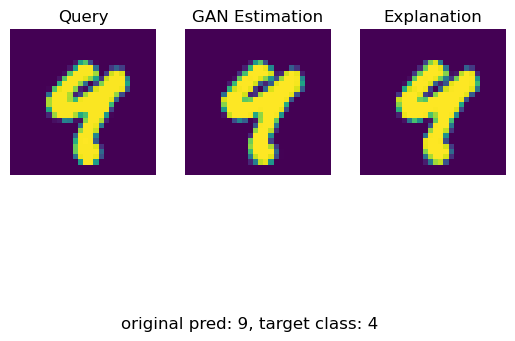

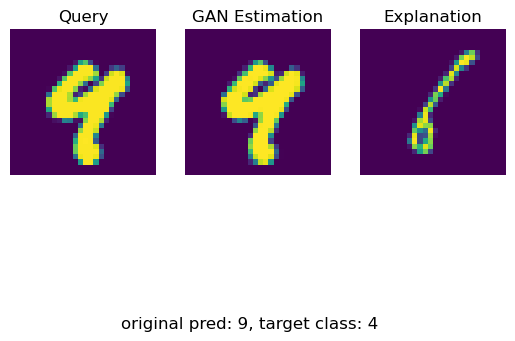

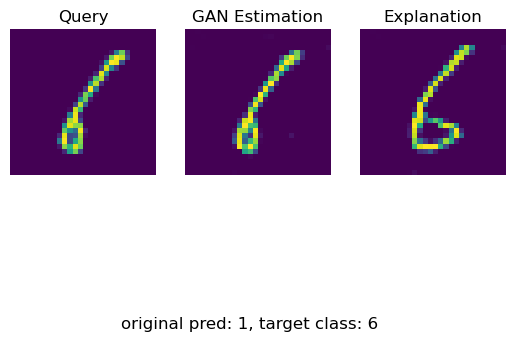

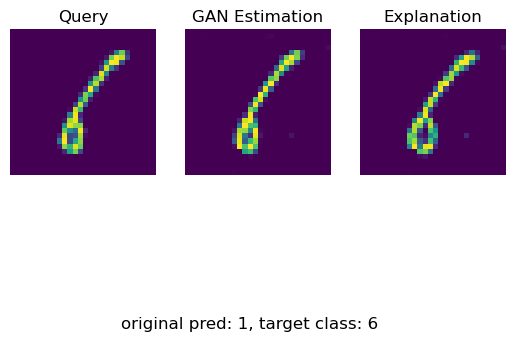

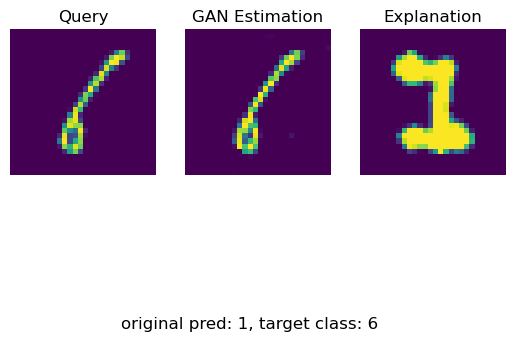

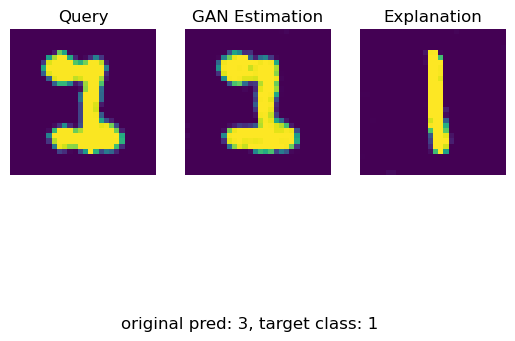

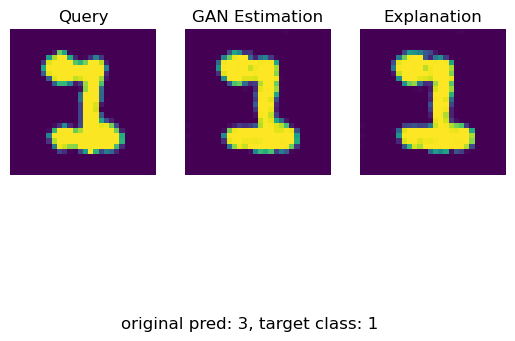

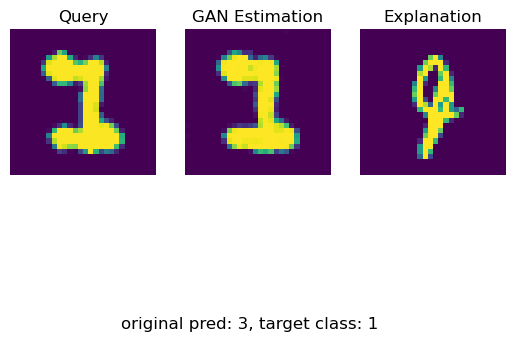

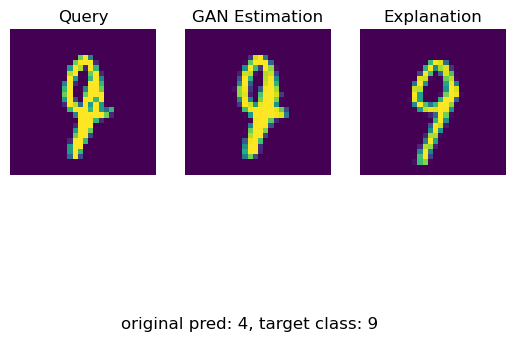

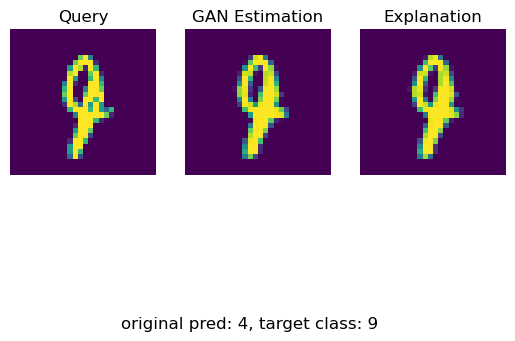

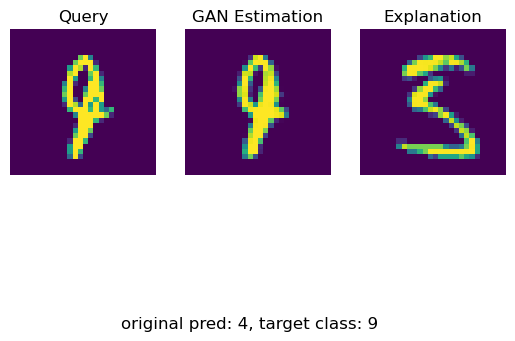

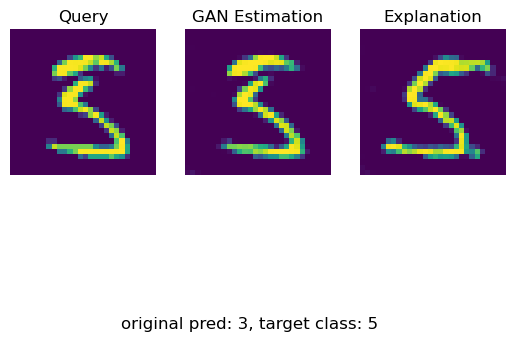

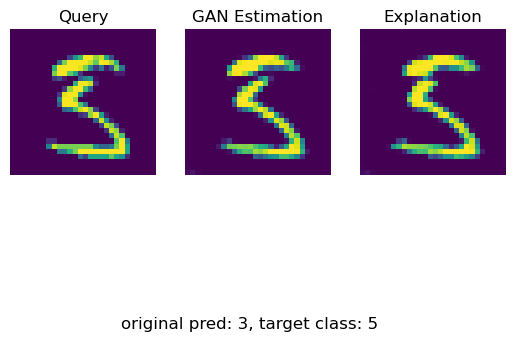

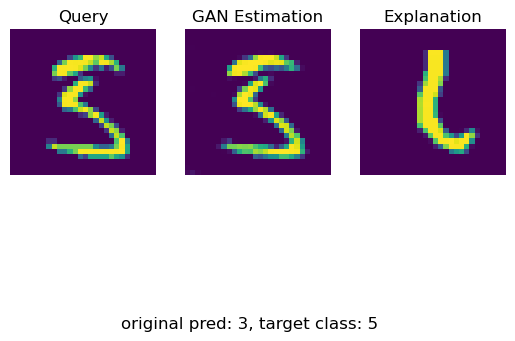

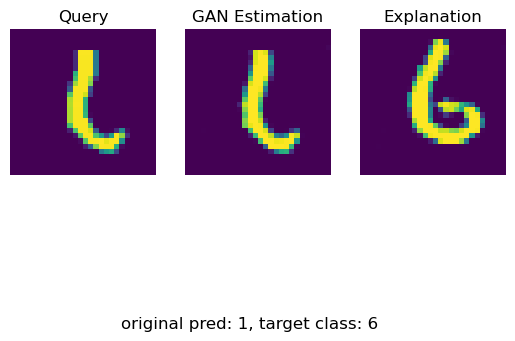

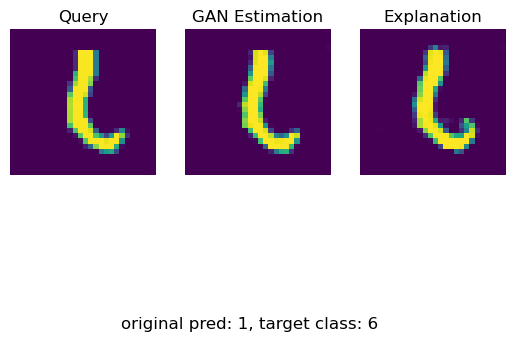

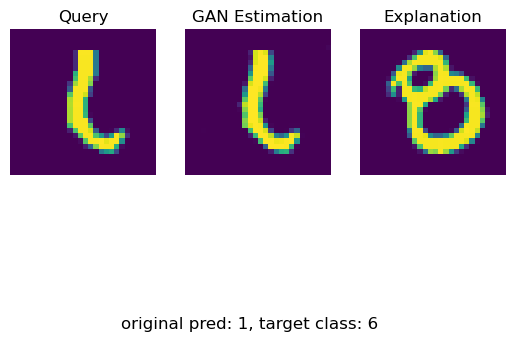

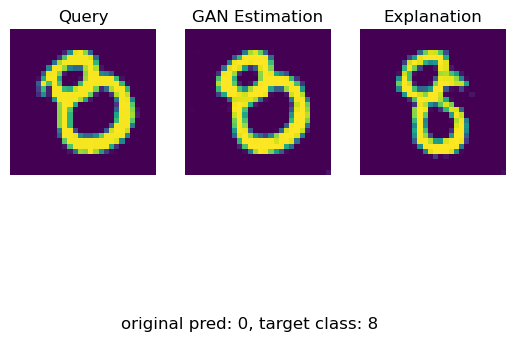

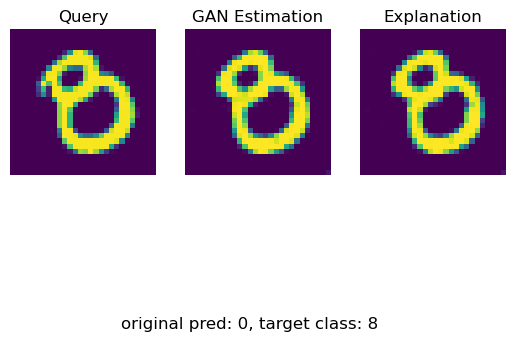

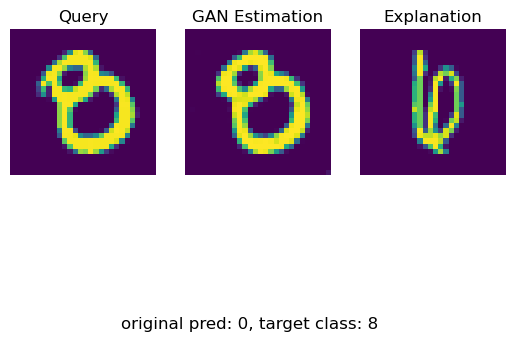

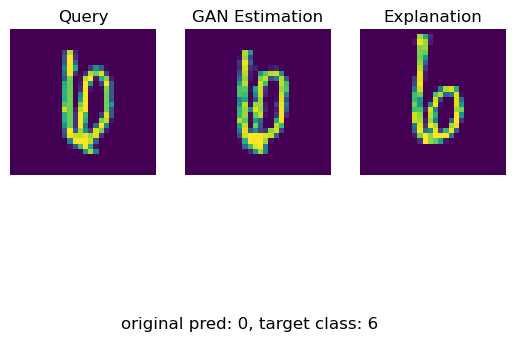

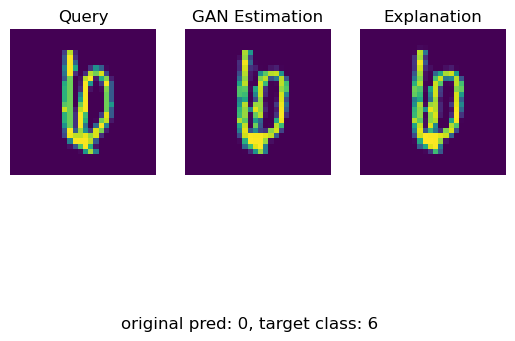

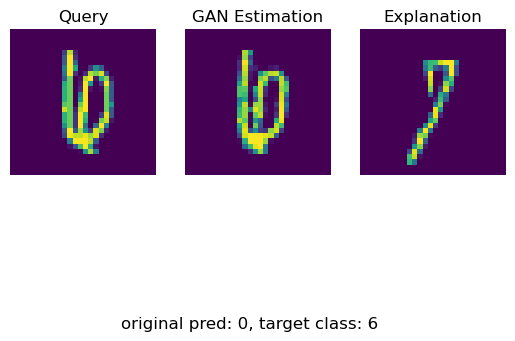

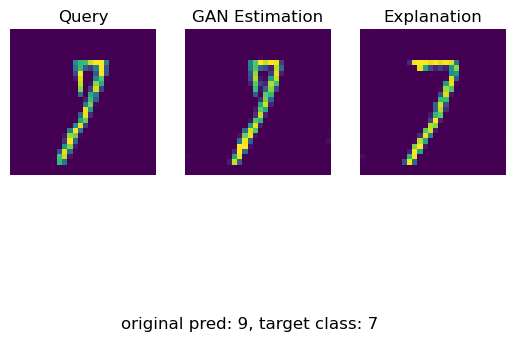

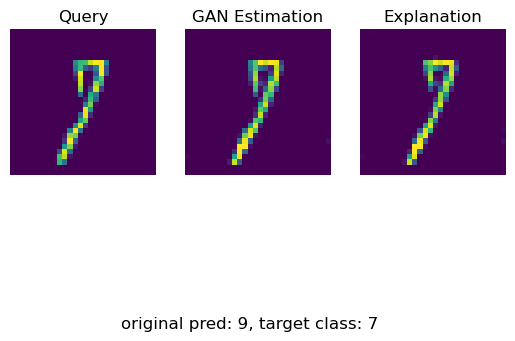

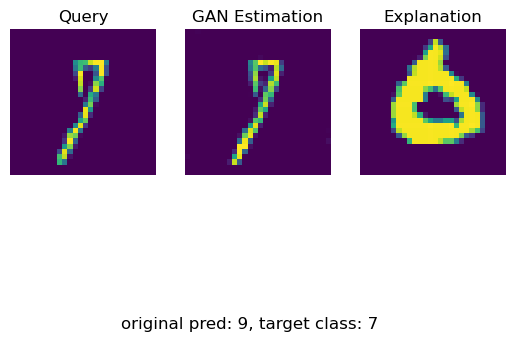

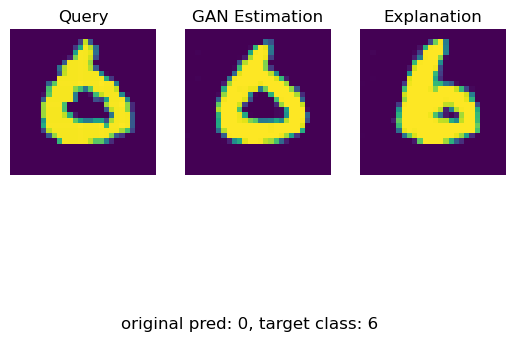

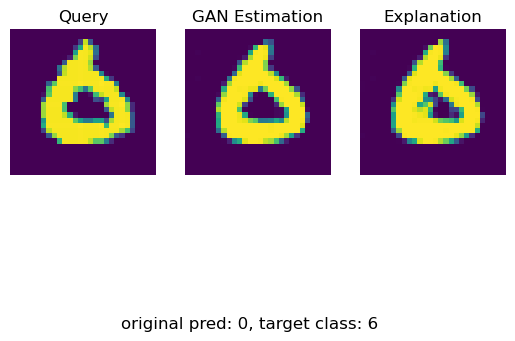

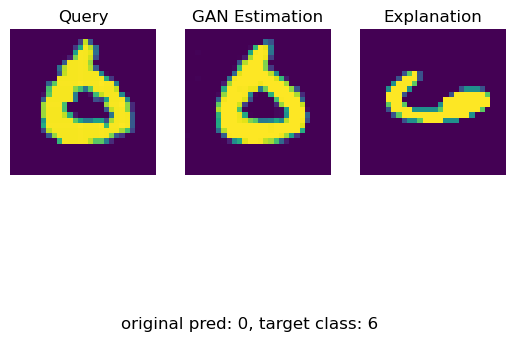

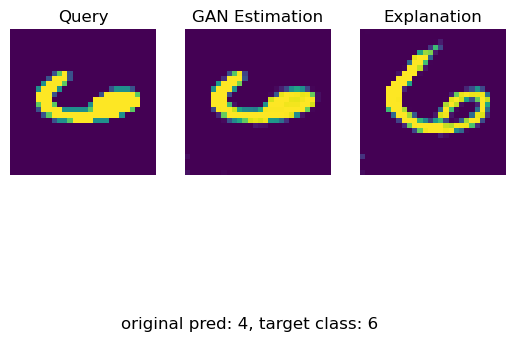

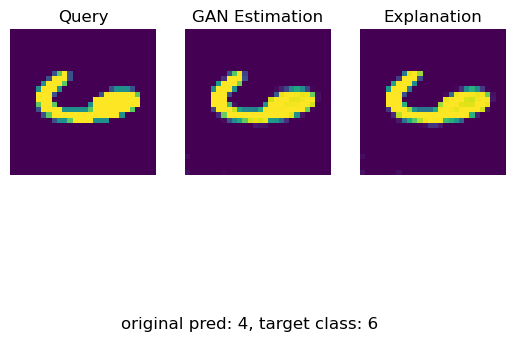

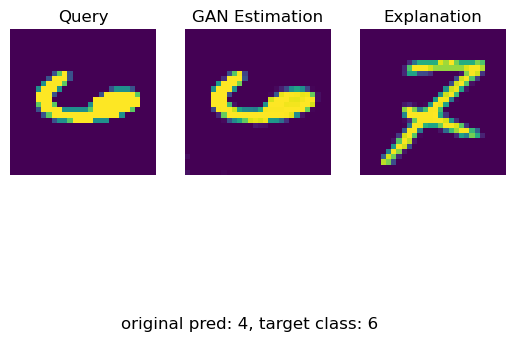

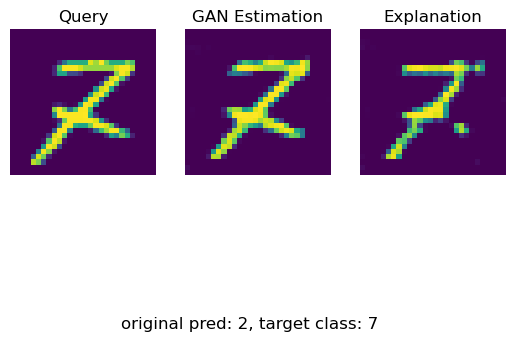

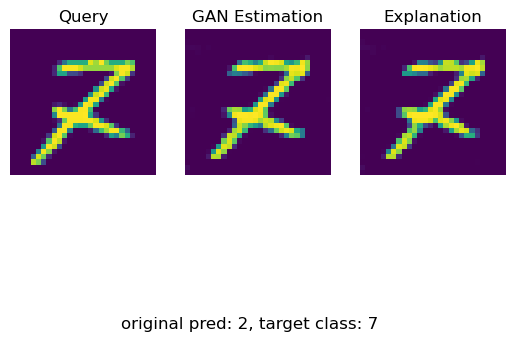

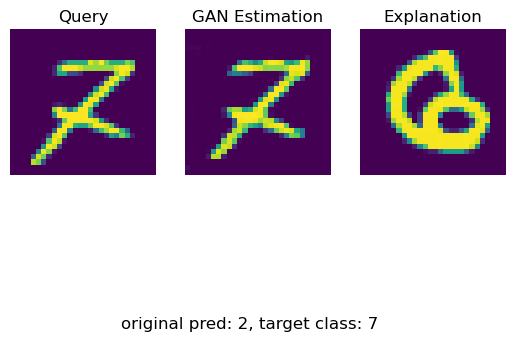

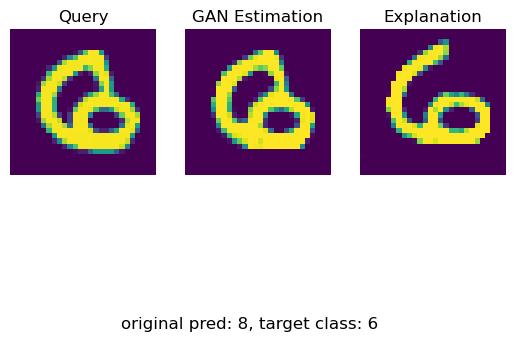

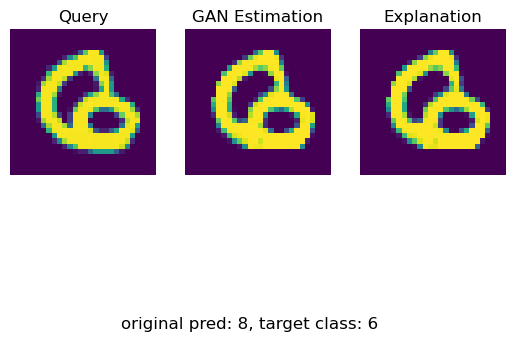

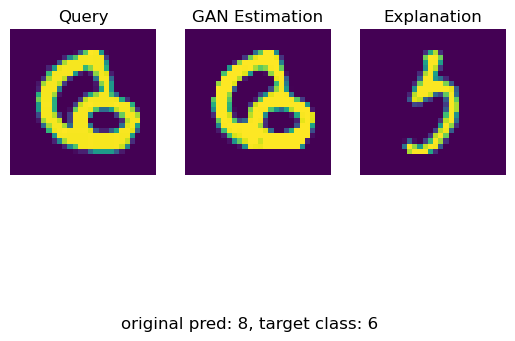

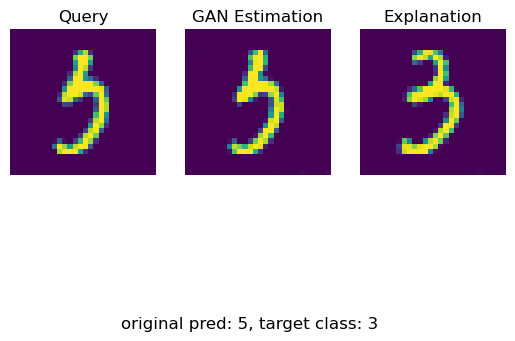

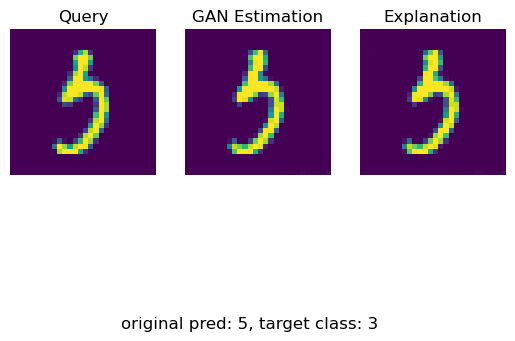

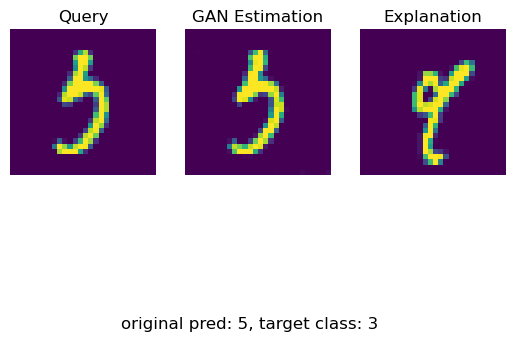

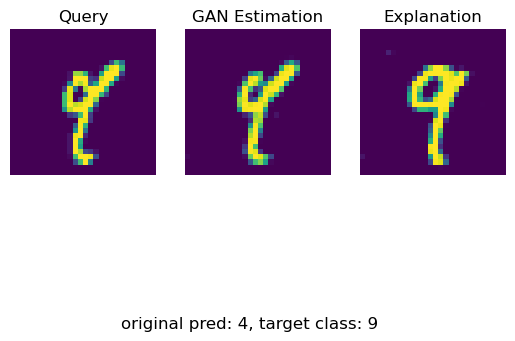

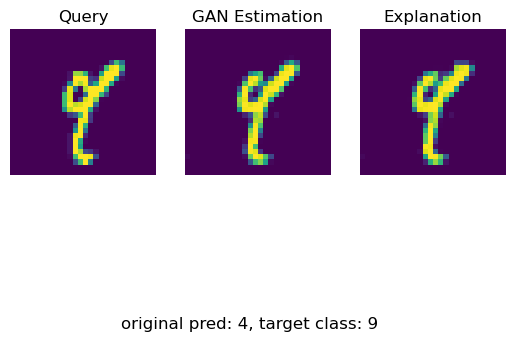

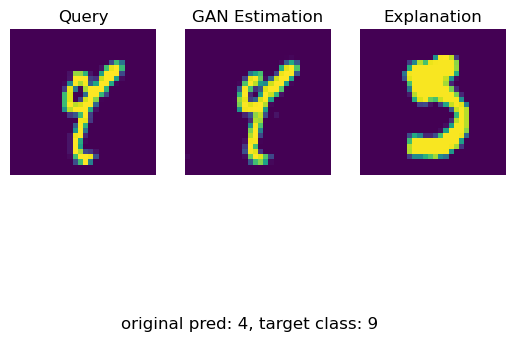

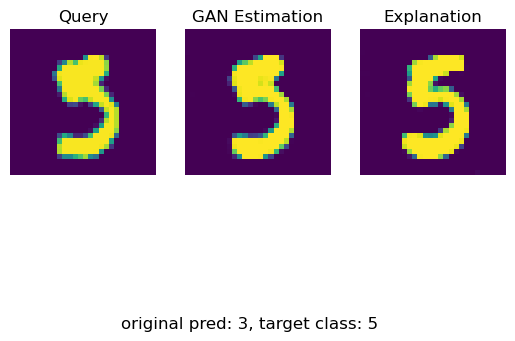

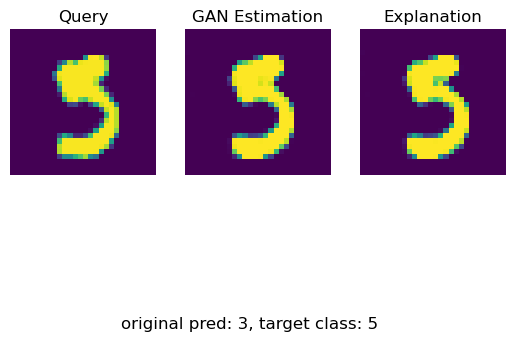

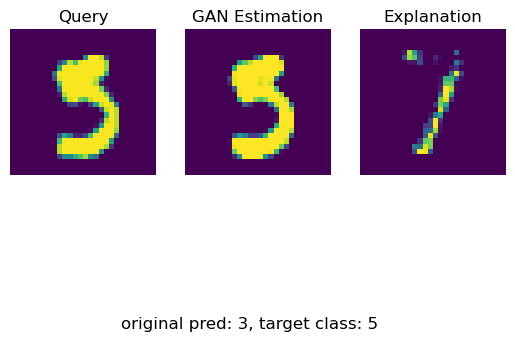

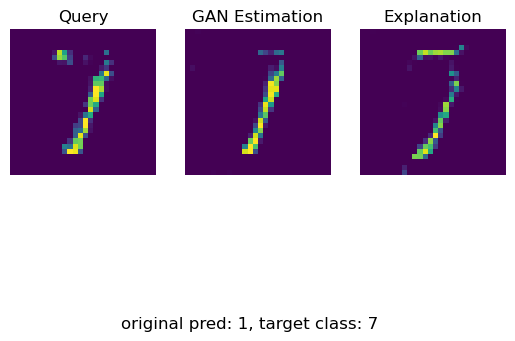

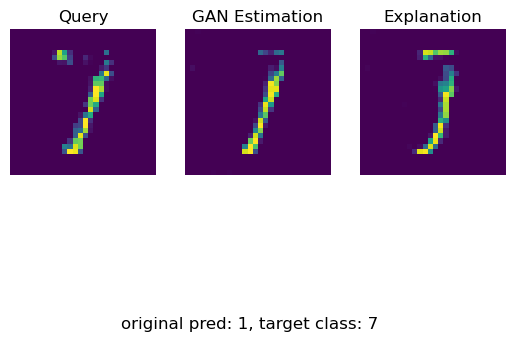

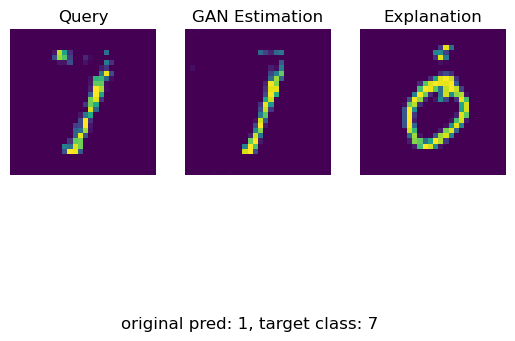

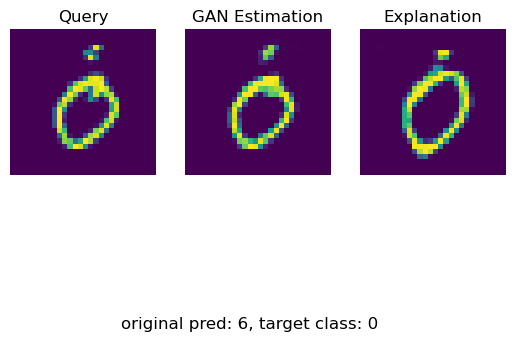

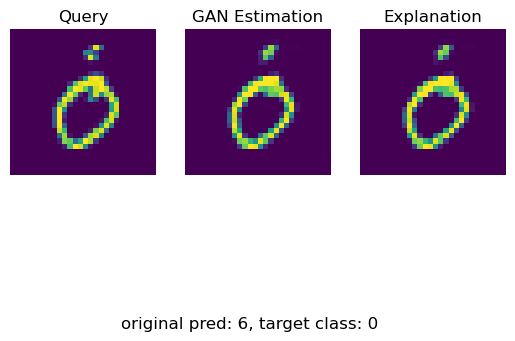

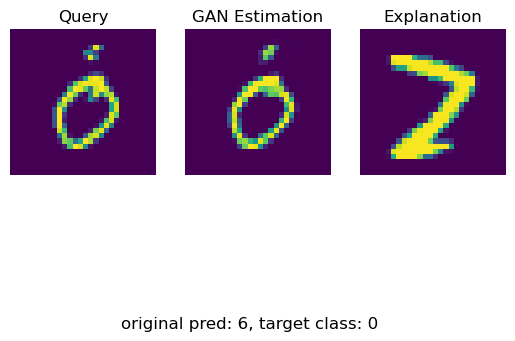

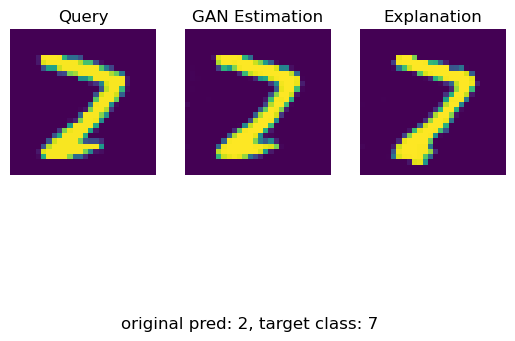

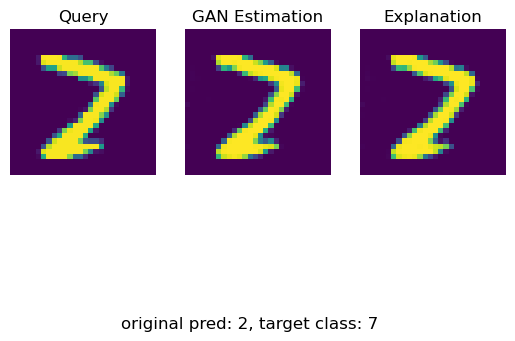

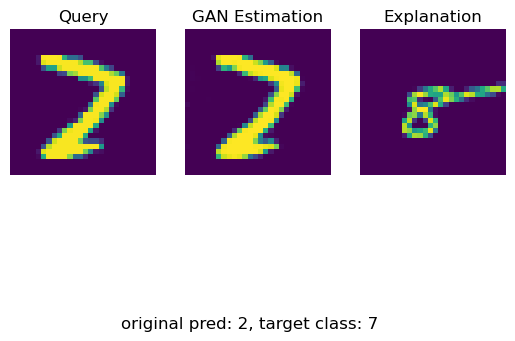

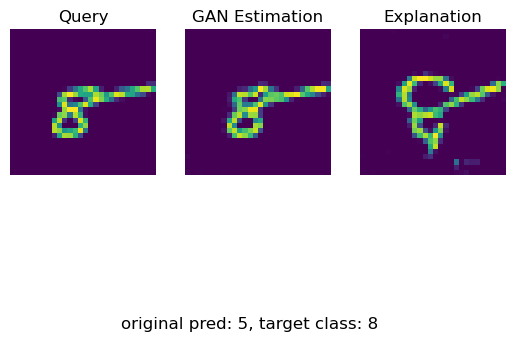

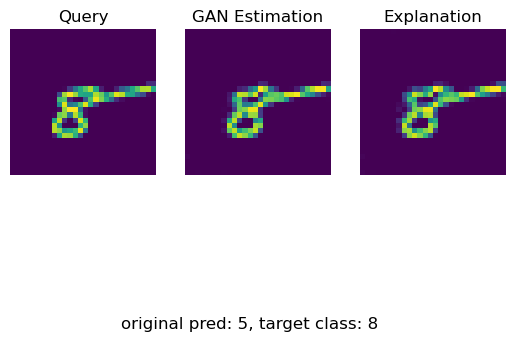

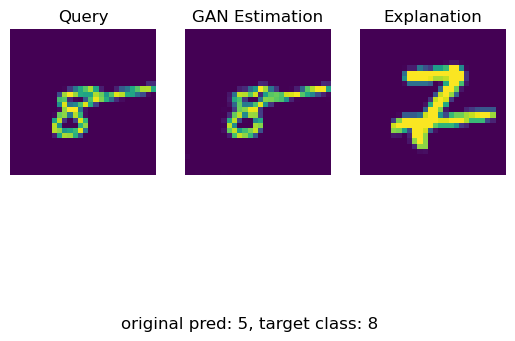

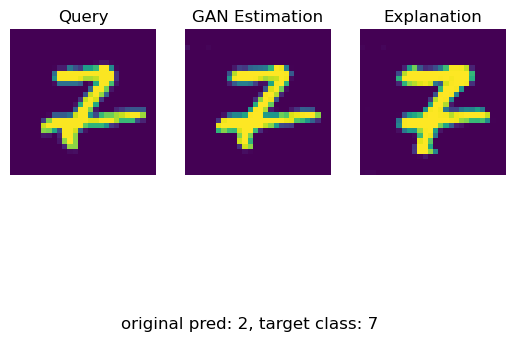

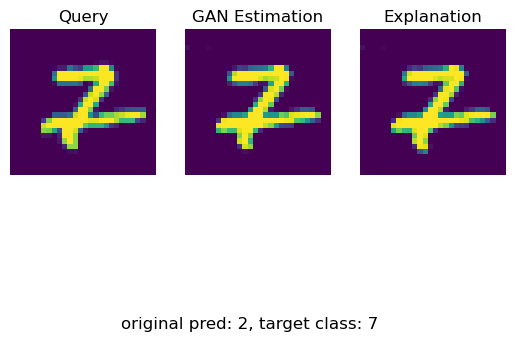

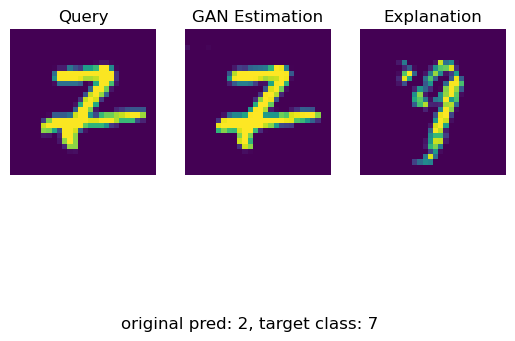

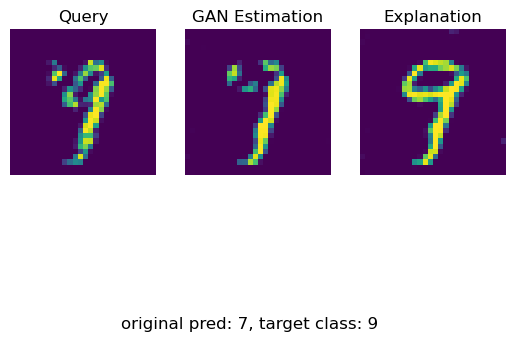

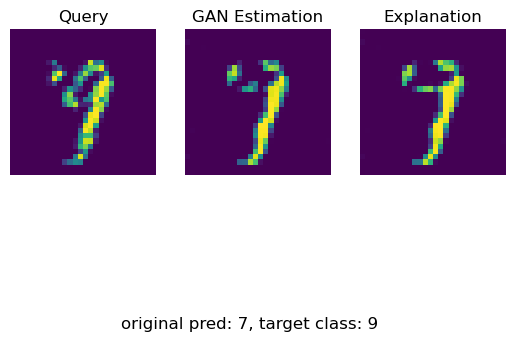

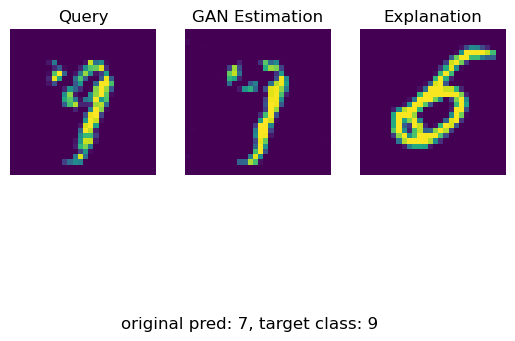

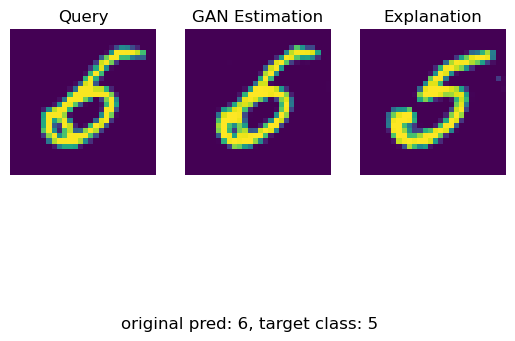

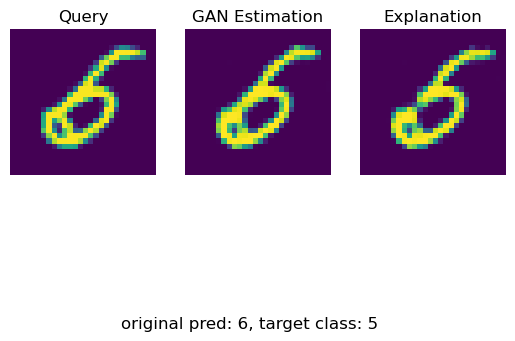

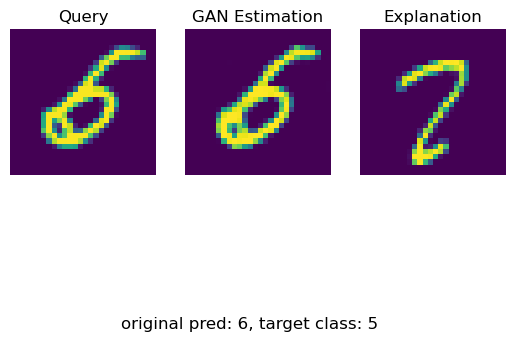

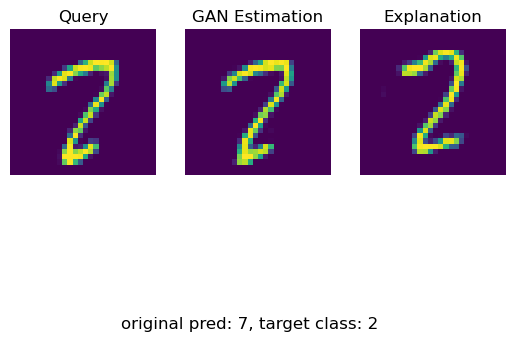

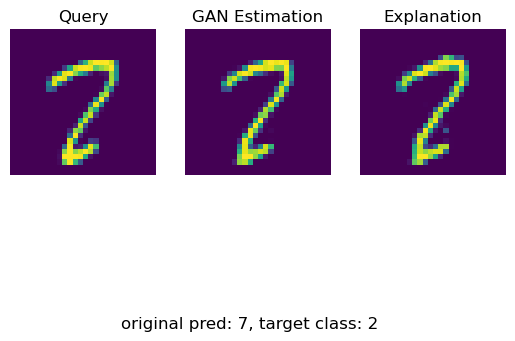

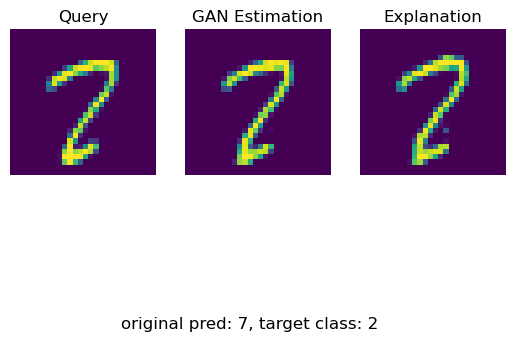

In [38]:
# Iterate though 41 Incorrect examples from MNIST
for rand_num in range(1, 42):

	# Get Query representations
	original_query_idx, original_query_img, target_class = get_missclassificaiton(test_loader, cnn, rand_num)
	original_query_pred = int(torch.argmax(cnn(original_query_img)[0]))
	z = torch.load("data/latent_g_input_saved/incorrect_latent/misclassify_" + str(rand_num) + ".pt") 
	query_activations = cnn(G(z))[1][0]

	#### ========== First two steps of PIECE Algorithm ========== ####
	# Step 1: Acquire the probability of each features, and identify the excpetional ones (i.e., those with a probability lower than alpha)
	df = acquire_feature_probabilities(target_class, cnn, original_query_img, alpha) 
	# Step 2: Filter out exceptional features which we want to change, and change them to their expected values in the counterfactual class
	df = filter_df_of_exceptional_noise(df, target_class, cnn, alpha)
	# Sort by least probable to the most probable
	df = df.sort_values('Probability of Event')
	# Get x' -- The Ideal Explanation
	ideal_xp = modifying_exceptional_features(df, target_class, query_activations)   
	ideal_xp = ideal_xp.clone().detach().float().requires_grad_(False)

	save_paths = {
		'PIECE': 'data/PIECE/',
		'Min-Edit': 'data/Min-Edit/',
		'C-Min-Edit': 'data/C-Min-Edit/'
	}

	# For Save z.pt
	for algorithm, path in save_paths.items():
		os.makedirs(path, exist_ok=True)


	for name in ['PIECE', 'Min-Edit', 'C-Min-Edit']:  # 'CEM', 'Proto-CF']:

		print(" ")
		print("-------------------------------")
		print(rand_num, name)
		print("-------------------------------")

		cnn = cnn.eval()
		temp_data = pd.DataFrame(columns=['rand_num', 'name', 'MC-Mean', 'MC-STD', 'NN-Dist', 'IM1', 'IM2', 'optim_time'])

		# Query
		x_q = cnn(G(z))[1][0]

		# Explanation latent input (to optimize...)
		z_e = z.clone().detach().float().requires_grad_()

		criterion = nn.MSELoss()

		start_time = time.time()

		if name == 'PIECE':
			optimizer = optim.Adam([z_e], lr=0.01)
			z_e = optim_PIECE(G, cnn, ideal_xp, z_e, criterion, optimizer)

		elif name == 'Min-Edit':
			optimizer = optim.Adam([z_e], lr=0.001)
			z_e = optim_min_edit(cnn, G, z_e, optimizer, target_class)

		elif name == 'C-Min-Edit':
			optimizer = optim.Adam([z_e], lr=0.001)
			z_e = optim_c_min_edit(G, cnn, x_q, z_e, criterion, optimizer, target_class)

		elif name == 'CEM':
			xp = optim_CEM_Explanation(original_query_idx)
			try:
				if xp == None:
					print("Couldn't Find Explanation")
					continue
			except:
				print('Found Explanation')

		elif name == 'Proto-CF':
			xp = optim_Proto_Explanation(original_query_idx)
			try:
				if xp == None:
					print("Couldn't Find Explanation")
					continue
			except:
				print('Found Explanation')
		torch.save(z_e, os.path.join(save_paths[name], f'z_e_{rand_num}.pt'))

		optim_time = time.time() - start_time

		if name == 'PIECE' or name == 'Min-Edit' or name == 'C-Min-Edit':
			I_e = G(z_e)
			
		elif name == 'CEM' or name == 'Proto-CF':
			I_e = torch.tensor(xp, dtype=torch.float32).reshape(-1,1,28,28)

		save_name = name
		save_query_and_gan_xp_for_final_data(I_e, cnn, z, G, z_e, original_query_img, save_name, rand_num, target_class, original_query_pred)
		print(f'Original Pred: {original_query_pred}, Target Class: {target_class}')
		
		# New prediction of explanation
		new_pred = int(torch.argmax(torch.exp(  cnn(I_e)[0]  )))
		
		# Metrics for Plausibility
		mc_dropout_results = mc_dropout(cnn, new_pred, I_e)
		nn_dist, _ = k_nn.kneighbors(X=np.array(    cnn(I_e)[1].detach().numpy()  )  , n_neighbors=2)
		IM1 = IM1_metric(I_e, aes, original_query_pred, new_pred)
		IM2 = IM2_metric(I_e, aes, ae_full, new_pred)
		
	
		temp_data = pd.Series({
			'rand_num': rand_num,
			'name': name,
			'MC-Mean': mc_dropout_results.mean(),
			'MC-STD': mc_dropout_results.std(),
			'NN-Dist': nn_dist[0][0],
			'IM1': IM1,
			'IM2': IM2,
			'optim_time': optim_time
		})

		# 将该 Series 添加到 DataFrame 中
		expt1_data = pd.concat([expt1_data, temp_data.to_frame().T], ignore_index=True) 
		if name == 'PIECE':
			df_piece = pd.concat([df_piece, temp_data.to_frame().T], ignore_index=True) 
		elif name == 'Min-Edit':
			df_ME = pd.concat([df_ME, temp_data.to_frame().T], ignore_index=True) 
		elif name == 'C-Min-Edit':
			df_CME = pd.concat([df_CME, temp_data.to_frame().T], ignore_index=True) 
		print("Time to do one digit:", round(time.time() - start_time, 3))

In [ ]:
expt1_data.to_csv('incorrect_MNIST_data.csv', index=False)

df_piece.to_csv('df_piece.csv', index=False)
df_ME.to_csv('df_ME.csv', index=False)
df_CME.to_csv('df_CME.csv', index=False)
	


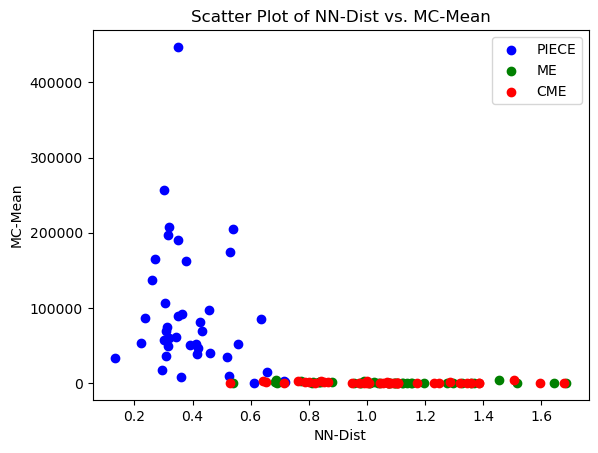

In [3]:
data_frame1 = pd.read_csv('df_piece.csv')
data_frame2 = pd.read_csv('df_ME.csv')
data_frame3 = pd.read_csv('df_CME.csv')

# 提取数据
x1 = data_frame1['NN-Dist']
y1 = data_frame1['MC-Mean']

x2 = data_frame2['NN-Dist']
y2 = data_frame2['MC-Mean']

x3 = data_frame3['NN-Dist']
y3 = data_frame3['MC-Mean']

# 绘制点图
plt.scatter(x1, y1, color='blue', label='PIECE')
plt.scatter(x2, y2, color='green', label='ME')
plt.scatter(x3, y3, color='red', label='CME')

# 添加图例和标签
plt.legend()
plt.xlabel('NN-Dist')
plt.ylabel('MC-Mean')
plt.title('Scatter Plot of NN-Dist vs. MC-Mean')

# 显示图形
plt.show()

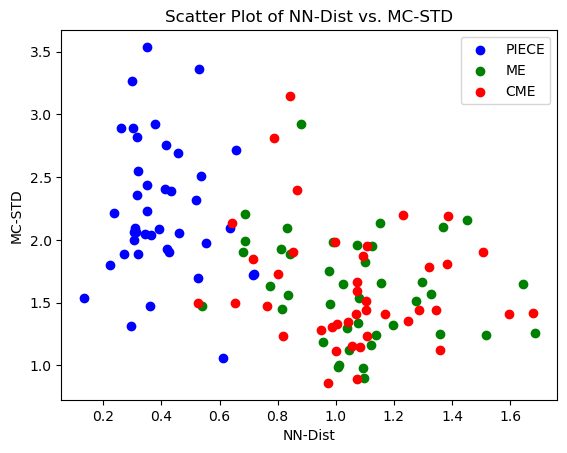

In [5]:
data_frame1 = pd.read_csv('df_piece.csv')
data_frame2 = pd.read_csv('df_ME.csv')
data_frame3 = pd.read_csv('df_CME.csv')

# 提取数据
x1 = data_frame1['NN-Dist']
y1 = data_frame1['MC-STD']/data_frame1['MC-Mean']

x2 = data_frame2['NN-Dist']
y2 = data_frame2['MC-STD']/data_frame2['MC-Mean']

x3 = data_frame3['NN-Dist']
y3 = data_frame3['MC-STD']/data_frame3['MC-Mean']

# 绘制点图
plt.scatter(x1, y1, color='blue', label='PIECE')
plt.scatter(x2, y2, color='green', label='ME')
plt.scatter(x3, y3, color='red', label='CME')

# 添加图例和标签
plt.legend()
plt.xlabel('NN-Dist')
plt.ylabel('MC-STD')
plt.title('Scatter Plot of NN-Dist vs. MC-STD')

# 显示图形
plt.show()

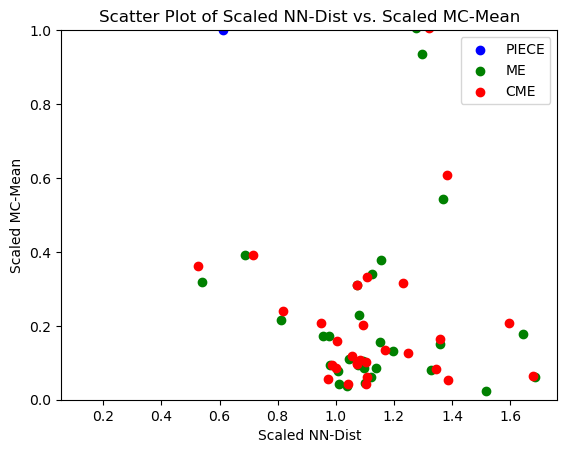

In [14]:
data_frame1 = pd.read_csv('df_piece.csv')
data_frame2 = pd.read_csv('df_ME.csv')
data_frame3 = pd.read_csv('df_CME.csv')

# 计算MC-Mean数组的均值
mean_mcmean_1 = data_frame1['MC-Mean'].mean()
mean_mcmean_2 = data_frame2['MC-Mean'].mean()
mean_mcmean_3 = data_frame3['MC-Mean'].mean()
min_mcmean_1 = data_frame1['MC-Mean'].min()


# 计算缩放因子
scale_factor_1 = 1 / min_mcmean_1
scale_factor_2 = 1 / mean_mcmean_2
scale_factor_3 = 1 / mean_mcmean_3

# 缩放MC-Mean数组的值并将其限制在0到1之间
y1_scaled = data_frame1['MC-Mean'] * scale_factor_1
y2_scaled = data_frame2['MC-Mean'] * scale_factor_2
y3_scaled = data_frame3['MC-Mean'] * scale_factor_3

# 将x轴的值缩放到0到1之间
x1_scaled = data_frame1['NN-Dist'] 
x2_scaled = data_frame2['NN-Dist'] 
x3_scaled = data_frame3['NN-Dist'] 

# 绘制点图
plt.scatter(x1_scaled, y1_scaled, color='blue', label='PIECE')
plt.scatter(x2_scaled, y2_scaled, color='green', label='ME')
plt.scatter(x3_scaled, y3_scaled, color='red', label='CME')

# 设置y轴的上限为MC-Mean数组的均值
plt.ylim(0, 1)

# 添加图例和标签
plt.legend()
plt.xlabel('Scaled NN-Dist')
plt.ylabel('Scaled MC-Mean')
plt.title('Scatter Plot of Scaled NN-Dist vs. Scaled MC-Mean')

# 显示图形
plt.show()


New Evalution 

In [ ]:
def generator_Classifier():
	"""
	one-Nearest Neighbor Classifier
	"""
    # 获取文件夹中所有的 .pt 文件路径
    file_paths_folder1 = glob.glob("data/latent_g_input_saved/incorrect_latent/*.pt")
    file_paths_folder2 = glob.glob("data/latent_g_input_saved/correct_latent/*.pt")
    file_paths_folder3 = glob.glob("data/latent_g_input_saved/PIECE/*.pt")
    #file_paths_folder3 = glob.glob("data/latent_g_input_saved/Min-Edit/*.pt")
    #file_paths_folder3 = glob.glob("data/latent_g_input_saved/C-Min-Edit/*.pt")

    all_file_paths = file_paths_folder1 + file_paths_folder2


    # 创建一个空的列表来存储图像数据集
    real_dataset = []
    cf_dataset =[ ]

    # 循环遍历每个文件路径
    for file_path in all_file_paths:
        # 加载 .pt 文件
        z = torch.load(file_path)
        
        # 生成图像并添加到数据集中
        image = G(z)
        real_dataset.append(image)
    
    for file_path in file_paths_folder3:
        # 加载 .pt 文件
        z = torch.load(file_path)
        
        # 生成图像并添加到数据集中
        image = G(z)
        cf_dataset.append(image)
    D = gen_images + real_images
    labels = [0] * len(gen_images) + [1] * len(real_images)

    # 初始化KNN分类器
    knn = KNeighborsClassifier(n_neighbors=1)

    # 留一法验证
    accuracies = []
    for i in range(len(D)):
        # 从数据集中移除第i个样本作为测试样本
        X_train = D[:i] + D[i+1:]
        y_train = labels[:i] + labels[i+1:]
        X_test = [D[i]]
        y_test = [labels[i]]

        # 训练1-NN分类器
        knn.fit(X_train, y_train)

        # 对测试样本进行分类
        y_pred = knn.predict(X_test)

        # 计算准确率并记录
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # 计算平均准确率
    mean_accuracy = sum(accuracies) / len(accuracies)

    # 打印最终的准确率
    print("Mean Accuracy:", mean_accuracy)

return mean_accuracy